<div style="text-align: center; margin: 40px 20px;">
    <div style="margin: 20px 0; border-top: 1px solid #B0E0E6; border-bottom:1px solid #B0E0E6; background-color:  #F0EDEE;">
 <font style="color: #058EE1; font-size:40px; font-weight: 700; text-align:center; text-transform: uppercase; letter-spacing: 1px; line-height:1.2;"> 📈 Statistical Data Analysis</font>
    </div>
 <font style="font-size:26px; font-weight: 700; text-align:center;"> Megaline📱 - Which one is a better plan?</font>
</div>

# Contents ⬇️ <a id='contents'></a>

[1. Contents ⬇️](#contents)   
[2. Introduction 📓](#introduction)  
[3. Project Goal 🎯](#project_goal)  
[4. Data Analysis 📊](#data-analysis)    
- [4.1 Initialization](#initialization)  
- [4.2 Load data](#load-data)  
- [4.3 Prepare the data](#prepare-the-data)    
- [4.4 Study plan conditions](#study-plan-conditions)  
- [4.5 Aggregate data per user](#aggregate-data-per-user)  
- [4.6 Study user behaviour](#study-user-behaviour)  
- [4.7 Study Revenue](#study-Revenue)  
- [4.8 Test statistical hypotheses](#test-statistical-hypotheses)  
- [4.9 General conclusion](#general-conclusion)  

<div style="border-bottom:2px solid #058EE1;"></div>

# Introduction 📓 <a id='introduction'></a> 
[Back to Contents](#contents)

**Megaline** is a telecom operator and it offers its clients two prepaid plans, **Surf** and **Ultimate**.  

**Surf**
- Monthly charge: &dollar;20
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
    - 1 minute: 3 cents
    - 1 text message: 3 cents
    - 1 GB of data: &dollar;10  

**Ultimate**
- Monthly charge: &dollar;70
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
    - 1 minute: 1 cent
    - 1 text message: 1 cent
    - 1 GB of data: &dollar;7  
    
The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. We have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.  

<div style="border-bottom:2px solid #058EE1;"></div>

# Project Goal 🎯 <a id='project_goal'></a>  
[Back to Contents](#contents)

We have the information related to 500 customers of **Megaline** which includes their identity, web sessions, plan type and the number of calls and text messages they made during the year 2018. We have 5 distinct files of data available:  

`megaline_calls.csv` - contains details about calls made by the customers.  
`megaline_internet.csv` - provides information on web sessions.  
`megaline_messages.csv` - contains data about text messages sent by the customers.  
`megaline_plans.csv` - includes details about the plans used by the customers.  
`megaline_users.csv` - contains information on the customers themselves.  

The ask is to analyze clients' behavior and **determine which prepaid plan brings in more revenue**.

<div style="border-bottom:2px solid #058EE1;"></div>

# Data Analysis 📊 <a id='data-analysis'></a>  
[Back to Contents](#contents)

## Initialization <a id='initialization'></a>  
[Back to Contents](#contents)

To begin with, we need a few libraries for our statistical analysis - `scipy`, `matplotlib`, `pandas`, `math` and `numpy`. We'll import all of them so that we can use the functions or methodds provided by them in our analysis:  
1. **NumPy**: It is a numerical computing library that provides support for arrays and matrices and mathematical operations that can be performed on them.  

2. **Pandas**: It is a data manipulation library that provides functions to read, write and manipulate data in various formats.  

3. **SciPy**: It is a library that provides scientific computing functions such as statistical analysis, integration, optimization, and signal processing.  

4. **Matplotlib**: It is a plotting library that is used to visualize data in various formats.  

5. **Math**: It is a library that provides mathematical functions such as trigonometric functions, logarithmic functions, etc.

6. **Seaborn**: It is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Loading all the libraries
import math as mt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

<div style="border-bottom:2px solid #058EE1;"></div>

## Load data <a id='load-data'></a>  
[Back to Contents](#contents)

We have been given 5 distinct files of data in `/datasets/` directory in `csv` format with comma as field separator:  

`megaline_calls.csv` - contains details about calls made by the customers.  
`megaline_internet.csv` - provides information on web sessions.  
`megaline_messages.csv` - contains data about text messages sent by the customers.  
`megaline_plans.csv` - includes details about the plans used by the customers.  
`megaline_users.csv` - contains information on the customers themselves.  

We need to read the data files and load the data into DataFrames using `read_csv()` method provided by `pandas`.

In [2]:
# Load the data files into different DataFrames
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')

<div style="border-bottom:2px solid #058EE1;"></div>

## Prepare the data <a id='prepare-the-data'></a>  
[Back to Contents](#contents)

The data for this project is split into several tables. We'll explore each one to get an initial understanding of the data and do necessary corrections to each table if necessary.

<div style="border-bottom:2px solid #058EE1;"></div>

### Plans

`plans` Dataframe includes details about the plans used by the customers.  

Get the general information of the data in the DataFrame - `plans`:

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


The Dataframe - `plans` has a total of **2 rows and 8 columns**.

The **columns description** are as follows:
- `plan_name` — calling plan name
- `minutes_included` — monthly minute allowance
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data volume allowance (in megabytes)
- `usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `usd_per_message` — price per text after exceeding the package limits
- `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)  

In the Data Description, it is given that there is a column - `usd_monthly_fee` that holds monthly charge in US dollars, but in the information above, we don't have a column with the exact name. Instead, we have `usd_monthly_pay`. It seems there is a slight mismatch in name. We can rename the column - `usd_monthly_pay` to `usd_monthly_fee` in order to be consistent with the data description provided.  

In [4]:
# Rename existing column to new name keeping it in sync with data description
plans = plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'})

Let's check the column names again using the `columns` attribute.

In [5]:
# Get the list of columns names
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_fee', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

It is also evident from the information we got from `info()` above that **we have no null values in the Dataframe - `plans`**.

Since, the Dataframe has only 2 rows, let's print all the rows from the Dataframe:

In [6]:
# Print data for plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div style="border-bottom:2px solid #058EE1;"></div>

#### Enrich data

Since Megaline rounds megabytes to gigabytes but we have data volume allowance in megabytes, we can derive a new column - `gb_per_month_included` using `mb_per_month_included`:

In [7]:
# Calculate data volume allowance from mbs to gbs - 1 GB = 1024 megabytes
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

Let's check the general information of the `plans` Dataframe again:

In [8]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


Let's see the data again:

In [9]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<div style="border-bottom:2px solid #058EE1;"></div>

### Users

`users` Dataframe contains information on the customers themselves.  

Get the general information of the data in the DataFrame - `users`:

In [10]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


The Dataframe - `users` has a total of **500 rows and 8 columns**.

The **columns description** are as follows:  
- `user_id` — unique user identifier
- `first_name` — user's name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` — subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- `city` — user's city of residence
- `plan` — calling plan name

It is evident from the information we got from `info()` above that **we have no null values in the Dataframe - `users` expect in `churn_date` column**. But, as per the description,if the value in `churn_data` column is missing, the calling plan was being used when this database was extracted.

Let's get a sample of 10 rows from the Dataframe:

In [11]:
# Print a sample of data for users
users.sample(n=10, random_state=100)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
69,1069,Dino,Fry,31,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-17,ultimate,NaN
29,1029,Franklyn,Henson,59,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-05,surf,NaN
471,1471,Britni,Mitchell,59,"Richmond, VA MSA",2018-10-13,surf,NaN
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,NaN
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
189,1189,Terrence,Smith,75,"Columbus, OH MSA",2018-09-24,surf,NaN
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaN
184,1184,Fredric,Middleton,39,"Sacramento–Roseville–Folsom, CA MSA",2018-03-07,ultimate,NaN
140,1140,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,NaN
125,1125,Assunta,Carver,39,"North Port-Sarasota-Bradenton, FL MSA",2018-08-16,surf,NaN


We can see from the output of `info()`  and `sample()` that **`reg_date` and `churn_date` columns are DateTime columns** of the format - `YYYY-MM-DD` but it's been stored as a String type in the DataFrame. It would be great to convert them both to the appropriate data types. We'll fix them in a while.

We can use the `duplicated()` method together with `sum()` to **check if we have any duplicate rows in the DataFrame - `users`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [12]:
# Checking for duplicated user records
users.duplicated().sum()

0

**We don't have any duplicate rows in the `users` Dataframe**.  

Let's check for just duplicate user IDs using `duplicated()` method together with `sum()`. Since, this time we want to find out if we have any duplicate user IDs, we will first get a Series of data for `user_id` column and then, apply `dupliacted()` method along with `sum()` on it.

In [13]:
# Checking for just duplicate user IDs
users['user_id'].duplicated().sum()

0

**We don't have any duplicate user IDs in the `users` Dataframe**.

Let's verify that the `plan` column contains only the two specified plans - **surf** and **ultimate**:

In [14]:
# Check plan column only contains the two specified plans
users['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

**The `plan` column has correct values and contains only the two specified plans - surf and ultimate**:

Let's verify that the `city` column doesn't have any duplicates because of differences in spellings and cases:

In [15]:
# Check if city column has any duplicate values
sorted(users['city'].unique())

['Albany-Schenectady-Troy, NY MSA',
 'Albuquerque, NM MSA',
 'Atlanta-Sandy Springs-Roswell, GA MSA',
 'Austin-Round Rock-Georgetown, TX MSA',
 'Bakersfield, CA MSA',
 'Baltimore-Columbia-Towson, MD MSA',
 'Baton Rouge, LA MSA',
 'Birmingham-Hoover, AL MSA',
 'Boston-Cambridge-Newton, MA-NH MSA',
 'Bridgeport-Stamford-Norwalk, CT MSA',
 'Buffalo-Cheektowaga, NY MSA',
 'Cape Coral-Fort Myers, FL MSA',
 'Charleston-North Charleston, SC MSA',
 'Charlotte-Concord-Gastonia, NC-SC MSA',
 'Chicago-Naperville-Elgin, IL-IN-WI MSA',
 'Cincinnati, OH-KY-IN MSA',
 'Cleveland-Elyria, OH MSA',
 'Colorado Springs, CO MSA',
 'Columbia, SC MSA',
 'Columbus, OH MSA',
 'Dallas-Fort Worth-Arlington, TX MSA',
 'Dayton-Kettering, OH MSA',
 'Denver-Aurora-Lakewood, CO MSA',
 'Detroit-Warren-Dearborn, MI MSA',
 'El Paso, TX MSA',
 'Fresno, CA MSA',
 'Grand Rapids-Kentwood, MI MSA',
 'Greensboro-High Point, NC MSA',
 'Houston-The Woodlands-Sugar Land, TX MSA',
 'Indianapolis-Carmel-Anderson, IN MSA',
 'Jackson

 **The `city` column doesn't have any duplicates because of differences in spellings and cases**.

#### Fix Data

Let's convert the types of `reg_date` and `churn_date` columns to DateTime of the format - `YYYY-MM-DD`:

In [16]:
# Convert reg_date to datetime format
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [17]:
# Convert churn_date to datetime format
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Let's check the data types of the Dataframe - `users` again using `dtypes` attribute:

In [18]:
users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

Let's get a sample of 10 rows from the Dataframe:

In [19]:
# Print a sample of data for users
users.sample(n=10, random_state=100)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
69,1069,Dino,Fry,31,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-17,ultimate,NaT
29,1029,Franklyn,Henson,59,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-05,surf,NaT
471,1471,Britni,Mitchell,59,"Richmond, VA MSA",2018-10-13,surf,NaT
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,NaT
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
189,1189,Terrence,Smith,75,"Columbus, OH MSA",2018-09-24,surf,NaT
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT
184,1184,Fredric,Middleton,39,"Sacramento–Roseville–Folsom, CA MSA",2018-03-07,ultimate,NaT
140,1140,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,NaT
125,1125,Assunta,Carver,39,"North Port-Sarasota-Bradenton, FL MSA",2018-08-16,surf,NaT


#### Enrich Data

Let's create a column - `full_name` by concatenating the first name and last name of the user.

In [20]:
users['full_name'] = users['first_name'] + ' ' + users['last_name']

Let's get a sample of 10 rows from the Dataframe:

In [21]:
# Print a sample of data for users
users.sample(n=10, random_state=100)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,full_name
69,1069,Dino,Fry,31,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-17,ultimate,NaT,Dino Fry
29,1029,Franklyn,Henson,59,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-05,surf,NaT,Franklyn Henson
471,1471,Britni,Mitchell,59,"Richmond, VA MSA",2018-10-13,surf,NaT,Britni Mitchell
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,NaT,Hugo Daugherty
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,Denis Frost
189,1189,Terrence,Smith,75,"Columbus, OH MSA",2018-09-24,surf,NaT,Terrence Smith
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT,Dinorah Simmons
184,1184,Fredric,Middleton,39,"Sacramento–Roseville–Folsom, CA MSA",2018-03-07,ultimate,NaT,Fredric Middleton
140,1140,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,NaT,Randolph Graves
125,1125,Assunta,Carver,39,"North Port-Sarasota-Bradenton, FL MSA",2018-08-16,surf,NaT,Assunta Carver


<div style="border-bottom:2px solid #058EE1;"></div>

### Calls

`calls` Dataframe contains details about calls made by the customers.

Get the general information of the data in the DataFrame - `calls`:

In [22]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


The Dataframe - `calls` has a total of **137735 rows and 4 columns**.

The **columns description** are as follows:  
- `id` — unique call identifier
- `call_date` — call date
- `duration` — call duration (in minutes)
- `user_id` — the identifier of the user making the call  

It is evident from the information we got from `info()` above that **we have no null values in the Dataframe - `calls`**.  

Also, we have `call_date` column of String data type. **We need to convert the data type of this column to DateTime.**

Let's get a sample of 10 rows from the Dataframe:

In [23]:
# Print a sample of data for calls
calls.sample(n=10, random_state=100)

,id,user_id,call_date,duration
72562,1257_302,1257,2018-11-15,20.74
88715,1324_773,1324,2018-06-23,7.91
44700,1161_115,1161,2018-12-09,5.79
81040,1291_640,1291,2018-04-29,14.45
9375,1042_305,1042,2018-05-05,12.28
107987,1382_984,1382,2018-10-19,12.47
112658,1397_265,1397,2018-10-19,13.18
117027,1408_676,1408,2018-04-19,12.23
13376,1057_255,1057,2018-10-25,0.00
2079,1009_501,1009,2018-11-13,0.00


We can use the `duplicated()` method together with `sum()` to **check if we have any duplicate rows in the DataFrame - `calls`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [24]:
# Checking for duplicated call records
calls.duplicated().sum()

0

**We don't have any duplicate rows in the `calls` Dataframe**.  

Let's check for just duplicate call IDs using `duplicated()` method together with `sum()`. Since, this time we want to find out if we have any duplicate user IDs, we will first get a Series of data for `id` column and then, apply `dupliacted()` method along with `sum()` on it.

In [25]:
# Checking for just duplicate call IDs
calls['id'].duplicated().sum()

0

**We don't have any duplicate call IDs in the `calls` Dataframe**.

#### Fix data

Let's convert the type of `call_date` column to DateTime of the format - `YYYY-MM-DD`:

In [26]:
# Convert call_date to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Let's check the data types of the Dataframe - `calls` again using `dtypes` attribute:

In [27]:
calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

Let's get a sample of 10 rows from the Dataframe:

In [28]:
# Print a sample of data for calls
calls.sample(n=10, random_state=100)

,id,user_id,call_date,duration
72562,1257_302,1257,2018-11-15,20.74
88715,1324_773,1324,2018-06-23,7.91
44700,1161_115,1161,2018-12-09,5.79
81040,1291_640,1291,2018-04-29,14.45
9375,1042_305,1042,2018-05-05,12.28
107987,1382_984,1382,2018-10-19,12.47
112658,1397_265,1397,2018-10-19,13.18
117027,1408_676,1408,2018-04-19,12.23
13376,1057_255,1057,2018-10-25,0.00
2079,1009_501,1009,2018-11-13,0.00


Now, since we have converted the `call_date` column to DateTime, we can easily verify if all the records are from year 2018 - 

In [29]:
# Check if all the records are from year 2018
calls['call_date'].dt.year.unique()

array([2018])

**All the records are indeed from the year 2018. There are no odd records**.

#### Enrich data

As per description, for `calls`, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. So, let's create a new column - `rounded_up_duration` from `duration` column by rounding off the values:

In [30]:
calls['rounded_up_duration'] = np.ceil(calls['duration'])

Let's also create a column - `call_month` that has only month and year portion of the `call_date`:

In [31]:
calls['call_month'] = calls['call_date'].dt.strftime('%b-%Y')

Let's get a sample of 10 rows from the Dataframe:

In [32]:
# Print a sample of data for calls
calls.sample(n=10, random_state=100)

,id,user_id,call_date,duration,rounded_up_duration,call_month
72562,1257_302,1257,2018-11-15,20.74,21.0,Nov-2018
88715,1324_773,1324,2018-06-23,7.91,8.0,Jun-2018
44700,1161_115,1161,2018-12-09,5.79,6.0,Dec-2018
81040,1291_640,1291,2018-04-29,14.45,15.0,Apr-2018
9375,1042_305,1042,2018-05-05,12.28,13.0,May-2018
107987,1382_984,1382,2018-10-19,12.47,13.0,Oct-2018
112658,1397_265,1397,2018-10-19,13.18,14.0,Oct-2018
117027,1408_676,1408,2018-04-19,12.23,13.0,Apr-2018
13376,1057_255,1057,2018-10-25,0.00,0.0,Oct-2018
2079,1009_501,1009,2018-11-13,0.00,0.0,Nov-2018


<div style="border-bottom:2px solid #058EE1;"></div>

### Messages

`messages` Dataframe contains data about text messages sent by the customers.

Get the general information of the data in the DataFrame - `messages`:

In [33]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The Dataframe - `messages` has a total of **76051 rows and 3 columns**.

The **columns description** are as follows:  
- `id` — unique text message identifier
- `message_date` — text message date
- `user_id` — the identifier of the user sending the text 

It is evident from the information we got from `info()` above that **we have no null values in the Dataframe - `messages`**.  

Also, we have `message_date` column of String data type. **We need to convert the data type of this column to DateTime.**

Let's get a sample of 10 rows from the Dataframe:

In [34]:
# Print a sample of data for messages
messages.sample(n=10, random_state=100)

,id,user_id,message_date
27652,1172_109,1172,2018-12-02
67387,1435_425,1435,2018-12-22
16140,1110_31,1110,2018-10-05
52094,1336_29,1336,2018-12-16
74767,1484_162,1484,2018-12-03
33895,1213_105,1213,2018-11-29
58754,1373_172,1373,2018-09-19
3321,1036_156,1036,2018-07-13
1653,1016_208,1016,2018-12-19
21376,1132_686,1132,2018-12-26


We can use the `duplicated()` method together with `sum()` to **check if we have any duplicate rows in the DataFrame - `messages`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [35]:
# Checking for duplicated message records
messages.duplicated().sum()

0

**We don't have any duplicate rows in the `messages` Dataframe**.  

Let's check for just duplicate text message IDs using `duplicated()` method together with `sum()`. Since, this time we want to find out if we have any duplicate user IDs, we will first get a Series of data for `id` column and then, apply `dupliacted()` method along with `sum()` on it.

In [36]:
# Checking for just duplicate text message IDs
messages['id'].duplicated().sum()

0

**We don't have any duplicate message IDs in the messages Dataframe.**

#### Fix data

Let's convert the type of `message_date` column to DateTime of the format - `YYYY-MM-DD`:

In [37]:
# Convert message_date to datetime format
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Let's check the data types of the Dataframe - `messages` again using `dtypes` attribute:

In [38]:
messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

Let's get a sample of 10 rows from the Dataframe:

In [39]:
# Print a sample of data for messages
messages.sample(n=10, random_state=100)

,id,user_id,message_date
27652,1172_109,1172,2018-12-02
67387,1435_425,1435,2018-12-22
16140,1110_31,1110,2018-10-05
52094,1336_29,1336,2018-12-16
74767,1484_162,1484,2018-12-03
33895,1213_105,1213,2018-11-29
58754,1373_172,1373,2018-09-19
3321,1036_156,1036,2018-07-13
1653,1016_208,1016,2018-12-19
21376,1132_686,1132,2018-12-26


Now, since we have converted the `message_date` column to DateTime, we can easily verify if all the records are from year 2018 - 

In [40]:
# Check if all the records are from year 2018
messages['message_date'].dt.year.unique()

array([2018])

**All the records are indeed from the year 2018. There are no odd records**.

#### Enrich data

Let's also create a column - `message_month` that has only month and year portion of the `message_date`:

In [41]:
messages['message_month'] = messages['message_date'].dt.strftime('%b-%Y')

Let's get a sample of 10 rows from the Dataframe:

In [42]:
# Print a sample of data for messages
messages.sample(n=10, random_state=100)

,id,user_id,message_date,message_month
27652,1172_109,1172,2018-12-02,Dec-2018
67387,1435_425,1435,2018-12-22,Dec-2018
16140,1110_31,1110,2018-10-05,Oct-2018
52094,1336_29,1336,2018-12-16,Dec-2018
74767,1484_162,1484,2018-12-03,Dec-2018
33895,1213_105,1213,2018-11-29,Nov-2018
58754,1373_172,1373,2018-09-19,Sep-2018
3321,1036_156,1036,2018-07-13,Jul-2018
1653,1016_208,1016,2018-12-19,Dec-2018
21376,1132_686,1132,2018-12-26,Dec-2018


<div style="border-bottom:2px solid #058EE1;"></div>

### Internet

`internet` Dataframe provides information on web sessions.

Get the general information of the data in the DataFrame - `internet`:

In [43]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


The Dataframe - `internet` has a total of **104825 rows and 4 columns**.

The **columns description** are as follows:  
- `id` — unique session identifier
- `mb_used` — the volume of data spent during the session (in megabytes)
- `session_date` — web session date
- `user_id` — user identifier  

It is evident from the information we got from `info()` above that **we have no null values in the Dataframe - `internet`**.  

Also, we have `session_date` column of String data type. **We need to convert the data type of this column to DateTime.**

Let's get a sample of 10 rows from the Dataframe:

In [44]:
# Print a sample of data for the internet traffic
internet.sample(n=10, random_state=100)

,id,user_id,session_date,mb_used
52071,1233_151,1233,2018-11-14,347.25
17527,1079_132,1079,2018-12-03,0.00
78045,1364_74,1364,2018-12-30,459.19
98810,1466_291,1466,2018-09-24,222.22
70473,1329_30,1329,2018-11-16,487.56
39942,1181_10,1181,2018-07-21,1145.38
103692,1496_0,1496,2018-10-19,348.64
97326,1458_405,1458,2018-10-22,0.00
18635,1083_87,1083,2018-11-24,328.03
98215,1465_28,1465,2018-11-20,625.68


We can use the `duplicated()` method together with `sum()` to **check if we have any duplicate rows in the DataFrame - `internet`**. `duplicated()` method returns a boolean Series (True/False) denoting duplicate rows. So, we could apply `sum()` over that series to get a summation of all the True(s) - and False(s).

In [45]:
# Checking for duplicated internet records
internet.duplicated().sum()

0

**We don't have any duplicate rows in the `internet` Dataframe**.  

Let's check for just duplicate session IDs using `duplicated()` method together with `sum()`. Since, this time we want to find out if we have any duplicate user IDs, we will first get a Series of data for `id` column and then, apply `dupliacted()` method along with `sum()` on it.

In [46]:
# Checking for just duplicate internet IDs
internet['id'].duplicated().sum()

0

**We don't have any duplicate session IDs in the internet Dataframe.**

#### Fix data

Let's convert the type of `session_date` column to DateTime of the format - `YYYY-MM-DD`:

In [47]:
# Convert session_date to datetime format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Let's check the data types of the Dataframe - `internet` again using `dtypes` attribute:

In [48]:
internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

Let's get a sample of 10 rows from the Dataframe:

In [49]:
# Print a sample of data for internet traffic
internet.sample(n=10, random_state=100)

,id,user_id,session_date,mb_used
52071,1233_151,1233,2018-11-14,347.25
17527,1079_132,1079,2018-12-03,0.00
78045,1364_74,1364,2018-12-30,459.19
98810,1466_291,1466,2018-09-24,222.22
70473,1329_30,1329,2018-11-16,487.56
39942,1181_10,1181,2018-07-21,1145.38
103692,1496_0,1496,2018-10-19,348.64
97326,1458_405,1458,2018-10-22,0.00
18635,1083_87,1083,2018-11-24,328.03
98215,1465_28,1465,2018-11-20,625.68


Now, since we have converted the `session_date` column to DateTime, we can easily verify if all the records are from year 2018 - 

In [50]:
# Check if all the records are from year 2018
internet['session_date'].dt.year.unique()

array([2018])

**All the records are indeed from the year 2018. There are no odd records**.

#### Enrich data

Since Megaline rounds megabytes to gigabytes but we have the volume of data spent during the session in megabytes, we can derive a new column - `gb_used` using `mb_used`:

In [51]:
# Calculate the volume of data spent during the session from mbs to gbs - 1 GB = 1024 megabytes
internet['gb_used'] = internet['mb_used'] / 1024

Let's also create a column - `session_month` that has only month and year portion of the `session_date`:

In [52]:
internet['session_month'] = internet['session_date'].dt.strftime('%b-%Y')

Now, let's see the list of columns again in `internet` Dataframe

In [53]:
# Get list of colums
internet.columns

Index(['id', 'user_id', 'session_date', 'mb_used', 'gb_used', 'session_month'], dtype='object')

Let's get a sample of 10 rows from the Dataframe:

In [54]:
# Print a sample of data for internet traffic
internet.sample(n=10, random_state=100)

,id,user_id,session_date,mb_used,gb_used,session_month
52071,1233_151,1233,2018-11-14,347.25,0.339111,Nov-2018
17527,1079_132,1079,2018-12-03,0.00,0.000000,Dec-2018
78045,1364_74,1364,2018-12-30,459.19,0.448428,Dec-2018
98810,1466_291,1466,2018-09-24,222.22,0.217012,Sep-2018
70473,1329_30,1329,2018-11-16,487.56,0.476133,Nov-2018
39942,1181_10,1181,2018-07-21,1145.38,1.118535,Jul-2018
103692,1496_0,1496,2018-10-19,348.64,0.340469,Oct-2018
97326,1458_405,1458,2018-10-22,0.00,0.000000,Oct-2018
18635,1083_87,1083,2018-11-24,328.03,0.320342,Nov-2018
98215,1465_28,1465,2018-11-20,625.68,0.611016,Nov-2018


<div style="border-bottom:2px solid #058EE1;"></div>

## Study plan conditions <a id='study-plan-conditions'></a>  
[Back to Contents](#contents)

It is critical to understand how the plans work, how users are charged based on their plan subscription. So, let's print out the plan information to view their conditions once again.

In [55]:
# Print out the plan conditions
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<div style="border-bottom:2px solid #058EE1;"></div>

## Aggregate data per user <a id='aggregate-data-per-user'></a>  
[Back to Contents](#contents)

### Number of calls made by each user per month

In order to calculate the number of calls made by each user per month, we need data from both `users` and `calls` Dataframes. Let's create a new Dataframe - `users_calls` by merging the two of them.

In [56]:
# Merge the users and calls Dataframes and print first 10 records
users_calls = users.merge(calls, on='user_id')
users_calls.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,full_name,id,call_date,duration,rounded_up_duration,call_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_93,2018-12-27,8.52,9.0,Dec-2018
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_145,2018-12-27,13.66,14.0,Dec-2018
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_247,2018-12-27,14.48,15.0,Dec-2018
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_309,2018-12-28,5.76,6.0,Dec-2018
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_380,2018-12-30,4.22,5.0,Dec-2018
5,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_388,2018-12-31,2.20,3.0,Dec-2018
6,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_510,2018-12-27,5.75,6.0,Dec-2018
7,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_521,2018-12-28,14.18,15.0,Dec-2018
8,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_530,2018-12-28,5.77,6.0,Dec-2018
9,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_544,2018-12-26,4.40,5.0,Dec-2018


Great! Let's create a pivot table with `user_id`, `full_name` and `call_month` as indices and apply `count()` on unique call identifiers - `id`, to get the number of calls made by each user per month:

In [57]:
# Calculate the number of calls made by each user per month. Save the result.

# Create a pivot table on user_id, full_name and call_month and count no. of unique call identifier - id
calls_per_user = users_calls.pivot_table(index=['user_id', 'full_name', 'call_month'], aggfunc={'id': 'count'})

# Give names to the columns of the the pivot table
calls_per_user.columns = ['number_of_calls']

Awesome! So, now we have the required data. Let's print the first 20 and last 20 records to view the results:

In [58]:
# Print first 20 records
calls_per_user.head(20)

number_of_calls
user_id full_name        call_month                 
1000    Anamaria Bauer   Dec-2018                 16
1001    Mickey Wilkerson Aug-2018                 27
                         Dec-2018                 56
                         Nov-2018                 64
                         Oct-2018                 65
                         Sep-2018                 49
1002    Carlee Hoffman   Dec-2018                 47
                         Nov-2018                 55
                         Oct-2018                 11
1003    Reynaldo Jenkins Dec-2018                149
1004    Leonila Thompson Aug-2018                 49
                         Dec-2018                 50
                         Jul-2018                 49
                         Jun-2018                 44
                         May-2018                 21
                         Nov-2018                 54
                         Oct-2018                 61
                         Sep-2018                 42
1005    Livia Shields    Dec-2018                 59
1006    Jesusa Bradford  Dec-2018                  9

In [59]:
# Print last 20 records
calls_per_user.tail(20)

number_of_calls
user_id full_name       call_month                 
1496    Ariel Shepherd  Dec-2018                 40
                        Nov-2018                 39
                        Oct-2018                 46
                        Sep-2018                 52
1497    Donte Barrera   Dec-2018                 54
1498    Scot Williamson Apr-2018                 47
                        Aug-2018                 44
                        Dec-2018                 39
                        Feb-2018                 37
                        Jul-2018                 43
                        Jun-2018                 37
                        Mar-2018                 37
                        May-2018                 35
                        Nov-2018                 41
                        Oct-2018                 46
                        Sep-2018                 45
1499    Shena Dickson   Dec-2018                 65
                        Nov-2018                 45
                        Oct-2018                 53
                        Sep-2018                 41

### Amount of minutes spent by each user per month

We already have `users_calls` Dataframe that we created by merging `users` and `calls` Dataframes. We will use the same Dataframe here. Let's print first 10 rows to peek into the data:

In [60]:
users_calls.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,full_name,id,call_date,duration,rounded_up_duration,call_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_93,2018-12-27,8.52,9.0,Dec-2018
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_145,2018-12-27,13.66,14.0,Dec-2018
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_247,2018-12-27,14.48,15.0,Dec-2018
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_309,2018-12-28,5.76,6.0,Dec-2018
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_380,2018-12-30,4.22,5.0,Dec-2018
5,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_388,2018-12-31,2.20,3.0,Dec-2018
6,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_510,2018-12-27,5.75,6.0,Dec-2018
7,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_521,2018-12-28,14.18,15.0,Dec-2018
8,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_530,2018-12-28,5.77,6.0,Dec-2018
9,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_544,2018-12-26,4.40,5.0,Dec-2018


Great! Let's create a pivot table with `user_id`, `full_name` and `call_month` as indices and apply `sum()` on `duration` to get total actual minutes spent by the users and on `rounded_up_duration` to get the rounded up minutes calculated for users, to get the amount of minutes spent by each user per month:

In [61]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# Create a pivot table on user_id, full_name and call_month and sum duration and rounded_up_duration
minutes_per_user = users_calls.pivot_table(index=['user_id', 'full_name', 'call_month'], aggfunc={'duration': 'sum', 'rounded_up_duration': 'sum'})

# Give names to the columns of the the pivot table
minutes_per_user.columns = ['amount_of_actual_mins', 'amount_of_rounded_up_mins']

Awesome! So, now we have the required data. Let's print the first 20 and last 20 records to view the results:

In [62]:
minutes_per_user.head(20)

amount_of_actual_mins  \
user_id full_name        call_month                          
1000    Anamaria Bauer   Dec-2018                   116.83   
1001    Mickey Wilkerson Aug-2018                   171.14   
                         Dec-2018                   392.93   
                         Nov-2018                   404.59   
                         Oct-2018                   374.11   
                         Sep-2018                   297.69   
1002    Carlee Hoffman   Dec-2018                   363.24   
                         Nov-2018                   359.76   
                         Oct-2018                    54.13   
1003    Reynaldo Jenkins Dec-2018                  1041.00   
1004    Leonila Thompson Aug-2018                   334.86   
                         Dec-2018                   403.53   
                         Jul-2018                   358.45   
                         Jun-2018                   261.32   
                         May-2018                   181.58   
                         Nov-2018                   452.98   
                         Oct-2018                   341.63   
                         Sep-2018                   284.60   
1005    Livia Shields    Dec-2018                   470.22   
1006    Jesusa Bradford  Dec-2018                    54.79   

                                     amount_of_rounded_up_mins  
user_id full_name        call_month                             
1000    Anamaria Bauer   Dec-2018                        124.0  
1001    Mickey Wilkerson Aug-2018                        182.0  
                         Dec-2018                        412.0  
                         Nov-2018                        426.0  
                         Oct-2018                        393.0  
                         Sep-2018                        315.0  
1002    Carlee Hoffman   Dec-2018                        384.0  
                         Nov-2018                        386.0  
                         Oct-2018                         59.0  
1003    Reynaldo Jenkins Dec-2018                       1104.0  
1004    Leonila Thompson Aug-2018                        354.0  
                         Dec-2018                        427.0  
                         Jul-2018                        381.0  
                         Jun-2018                        275.0  
                         May-2018                        193.0  
                         Nov-2018                        476.0  
                         Oct-2018                        365.0  
                         Sep-2018                        301.0  
1005    Livia Shields    Dec-2018                        496.0  
1006    Jesusa Bradford  Dec-2018                         59.0

In [63]:
minutes_per_user.tail(20)

amount_of_actual_mins  \
user_id full_name       call_month                          
1496    Ariel Shepherd  Dec-2018                   278.61   
                        Nov-2018                   291.88   
                        Oct-2018                   301.16   
                        Sep-2018                   389.94   
1497    Donte Barrera   Dec-2018                   276.53   
1498    Scot Williamson Apr-2018                   344.18   
                        Aug-2018                   244.57   
                        Dec-2018                   324.77   
                        Feb-2018                   231.87   
                        Jul-2018                   304.49   
                        Jun-2018                   225.57   
                        Mar-2018                   247.72   
                        May-2018                   275.13   
                        Nov-2018                   208.99   
                        Oct-2018                   278.06   
                        Sep-2018                   344.62   
1499    Shena Dickson   Dec-2018                   468.10   
                        Nov-2018                   288.56   
                        Oct-2018                   363.28   
                        Sep-2018                   330.37   

                                    amount_of_rounded_up_mins  
user_id full_name       call_month                             
1496    Ariel Shepherd  Dec-2018                        294.0  
                        Nov-2018                        308.0  
                        Oct-2018                        317.0  
                        Sep-2018                        414.0  
1497    Donte Barrera   Dec-2018                        300.0  
1498    Scot Williamson Apr-2018                        365.0  
                        Aug-2018                        266.0  
                        Dec-2018                        339.0  
                        Feb-2018                        244.0  
                        Jul-2018                        321.0  
                        Jun-2018                        238.0  
                        Mar-2018                        266.0  
                        May-2018                        288.0  
                        Nov-2018                        223.0  
                        Oct-2018                        298.0  
                        Sep-2018                        363.0  
1499    Shena Dickson   Dec-2018                        496.0  
                        Nov-2018                        308.0  
                        Oct-2018                        385.0  
                        Sep-2018                        346.0

### Number of messages sent by each user per month

In order to calculate the number of messages sent by each user per month, we need data from both `users` and `messages` Dataframes. Let's create a new Dataframe - `users_messages` by merging the two of them.

In [64]:
# Merge the users and messages Dataframes and print first 10 records
users_messages = users.merge(messages, on='user_id')
users_messages.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,full_name,id,message_date,message_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_125,2018-12-27,Dec-2018
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_160,2018-12-31,Dec-2018
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_223,2018-12-31,Dec-2018
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_251,2018-12-27,Dec-2018
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_255,2018-12-26,Dec-2018
5,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_346,2018-12-29,Dec-2018
6,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_386,2018-12-30,Dec-2018
7,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_413,2018-12-31,Dec-2018
8,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_502,2018-12-27,Dec-2018
9,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_525,2018-12-28,Dec-2018


Great! Let's create a pivot table with `user_id`, `full_name` and `message_month` as indices and apply `count()` on unique text message identifiers - `id`, to get the number of messages sent by each user per month:

In [65]:
# Calculate the number of messages sent by each user per month. Save the result.

# Create a pivot table on user_id, full_name and message_month and count no. of unique text message identifier - id
messages_per_user = users_messages.pivot_table(index=['user_id', 'full_name', 'message_month'], aggfunc={'id': 'count'})

# Give names to the columns of the the pivot table
messages_per_user.columns = ['number_of_messages']

Awesome! So, now we have the required data. Let's print the first 20 and last 20 records to view the results:

In [66]:
messages_per_user.head(20)

number_of_messages
user_id full_name        message_month                    
1000    Anamaria Bauer   Dec-2018                       11
1001    Mickey Wilkerson Aug-2018                       30
                         Dec-2018                       44
                         Nov-2018                       36
                         Oct-2018                       53
                         Sep-2018                       44
1002    Carlee Hoffman   Dec-2018                       41
                         Nov-2018                       32
                         Oct-2018                       15
1003    Reynaldo Jenkins Dec-2018                       50
1004    Leonila Thompson Aug-2018                       25
                         Dec-2018                       31
                         Jul-2018                       26
                         Jun-2018                       18
                         May-2018                        7
                         Nov-2018                       25
                         Oct-2018                       24
                         Sep-2018                       21
1005    Livia Shields    Dec-2018                       11
1006    Jesusa Bradford  Dec-2018                      139

In [67]:
messages_per_user.tail(20)

number_of_messages
user_id full_name      message_month                    
1491    Terina Jensen  May-2018                       45
                       Nov-2018                       46
                       Oct-2018                       51
                       Sep-2018                       50
1492    Elvie Jones    Dec-2018                       37
                       Nov-2018                       31
                       Oct-2018                       29
                       Sep-2018                       11
1494    Preston Downs  Aug-2018                       27
                       Dec-2018                       33
                       Jul-2018                       20
                       Nov-2018                       35
                       Oct-2018                       38
                       Sep-2018                       21
1496    Ariel Shepherd Aug-2018                        2
                       Dec-2018                       11
                       Nov-2018                       13
                       Oct-2018                       18
                       Sep-2018                       21
1497    Donte Barrera  Dec-2018                       50

### Volume of internet traffic used by each user per month

In order to calculate the volume of internet traffic used by each user per month, we need data from both `users` and `internet` Dataframes. Let's create a new Dataframe - `users_internet` by merging the two of them.

In [68]:
# Merge the users and internet Dataframes and print first 10 records
users_internet = users.merge(internet, on='user_id')
users_internet.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,full_name,id,session_date,mb_used,gb_used,session_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_13,2018-12-29,89.86,0.087754,Dec-2018
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_204,2018-12-31,0.00,0.000000,Dec-2018
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_379,2018-12-28,660.40,0.644922,Dec-2018
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_413,2018-12-26,270.99,0.264639,Dec-2018
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Anamaria Bauer,1000_442,2018-12-27,880.22,0.859590,Dec-2018
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Mickey Wilkerson,1001_0,2018-08-24,284.68,0.278008,Aug-2018
6,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Mickey Wilkerson,1001_3,2018-12-09,656.04,0.640664,Dec-2018
7,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Mickey Wilkerson,1001_4,2018-11-04,16.97,0.016572,Nov-2018
8,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Mickey Wilkerson,1001_10,2018-11-27,135.18,0.132012,Nov-2018
9,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Mickey Wilkerson,1001_15,2018-12-13,761.92,0.744062,Dec-2018


Great! Let's create a pivot table with `user_id`, `full_name` and `session_month` as indices and apply `sum()` on `gb_used` to get total actual gb used by the users each month, to get volume of internet traffic used by each user per month:

In [69]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

# Create a pivot table on user_id, full_name and session_month and apply sum on gb_used
internet_traffic_per_user = users_internet.pivot_table(index=['user_id', 'full_name', 'session_month'], aggfunc={'gb_used': 'sum'})

# Give names to the columns of the the pivot table
internet_traffic_per_user.columns = ['actual_gb_used']

Awesome! So, now we have the required data. Let's print the first 20 and last 20 records to view the results:

In [70]:
internet_traffic_per_user.head(10)

actual_gb_used
user_id full_name        session_month                
1000    Anamaria Bauer   Dec-2018             1.856904
1001    Mickey Wilkerson Aug-2018             6.756982
                         Dec-2018            18.915215
                         Nov-2018            18.070605
                         Oct-2018            21.807119
                         Sep-2018            13.002754
1002    Carlee Hoffman   Dec-2018            14.058828
                         Nov-2018            18.891680
                         Oct-2018             6.398447
1003    Reynaldo Jenkins Dec-2018            26.410293

In [71]:
internet_traffic_per_user.tail(20)

actual_gb_used
user_id full_name       session_month                
1496    Ariel Shepherd  Dec-2018            16.053701
                        Nov-2018             8.347031
                        Oct-2018            13.952500
                        Sep-2018            16.005146
1497    Donte Barrera   Dec-2018            10.846240
1498    Scot Williamson Apr-2018            19.412949
                        Aug-2018            19.787002
                        Dec-2018            22.595400
                        Feb-2018            19.357461
                        Jul-2018            24.252314
                        Jun-2018            14.460137
                        Mar-2018            19.281582
                        May-2018            21.935713
                        Nov-2018            18.719287
                        Oct-2018            20.098398
                        Sep-2018            22.292266
1499    Shena Dickson   Dec-2018            21.542197
                        Nov-2018            16.419756
                        Oct-2018            19.035576
                        Sep-2018            12.680430

Wow! We are making a good progress. But, as per the Data Description, for web traffic, **individual web sessions are not rounded up. Instead, the total for the month is rounded up**. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes. So, let's create another column - `rounded_up_gb_used` where we can round up the total gb used for each month:

In [72]:
internet_traffic_per_user['rounded_up_gb_used'] = np.ceil(internet_traffic_per_user['actual_gb_used'])
internet_traffic_per_user.head(20)

actual_gb_used  rounded_up_gb_used
user_id full_name        session_month                                    
1000    Anamaria Bauer   Dec-2018             1.856904                 2.0
1001    Mickey Wilkerson Aug-2018             6.756982                 7.0
                         Dec-2018            18.915215                19.0
                         Nov-2018            18.070605                19.0
                         Oct-2018            21.807119                22.0
                         Sep-2018            13.002754                14.0
1002    Carlee Hoffman   Dec-2018            14.058828                15.0
                         Nov-2018            18.891680                19.0
                         Oct-2018             6.398447                 7.0
1003    Reynaldo Jenkins Dec-2018            26.410293                27.0
1004    Leonila Thompson Aug-2018            27.325918                28.0
                         Dec-2018            20.887979                21.0
                         Jul-2018            23.942012                24.0
                         Jun-2018            20.188301                21.0
                         May-2018             6.393760                 7.0
                         Nov-2018            21.338652                22.0
                         Oct-2018            14.200811                15.0
                         Sep-2018            18.410859                19.0
1005    Livia Shields    Dec-2018            16.738447                17.0
1006    Jesusa Bradford  Dec-2018            31.366035                32.0

### Combined data for calls, minutes, messages, internet for all the users

Now, **let's put the aggregate data together into one DataFrame - `user_consumption_per_month` so that one record in it would represent what an unique user consumed in a given month**.

Let's first flatten the `calls_per_user` and `minutes_per_user` Dataframes so that we can merge them both on `user_id` and `call_month`.

In [73]:
# Flatten calls_per_user Dataframe
calls_per_user = calls_per_user.reset_index()
calls_per_user.head(10)

,user_id,full_name,call_month,number_of_calls
0,1000,Anamaria Bauer,Dec-2018,16
1,1001,Mickey Wilkerson,Aug-2018,27
2,1001,Mickey Wilkerson,Dec-2018,56
3,1001,Mickey Wilkerson,Nov-2018,64
4,1001,Mickey Wilkerson,Oct-2018,65
5,1001,Mickey Wilkerson,Sep-2018,49
6,1002,Carlee Hoffman,Dec-2018,47
7,1002,Carlee Hoffman,Nov-2018,55
8,1002,Carlee Hoffman,Oct-2018,11
9,1003,Reynaldo Jenkins,Dec-2018,149


In [74]:
# Flatten minutes_per_user Dataframe
minutes_per_user = minutes_per_user.reset_index()
minutes_per_user.head(10)

,user_id,full_name,call_month,amount_of_actual_mins,amount_of_rounded_up_mins
0,1000,Anamaria Bauer,Dec-2018,116.83,124.0
1,1001,Mickey Wilkerson,Aug-2018,171.14,182.0
2,1001,Mickey Wilkerson,Dec-2018,392.93,412.0
3,1001,Mickey Wilkerson,Nov-2018,404.59,426.0
4,1001,Mickey Wilkerson,Oct-2018,374.11,393.0
5,1001,Mickey Wilkerson,Sep-2018,297.69,315.0
6,1002,Carlee Hoffman,Dec-2018,363.24,384.0
7,1002,Carlee Hoffman,Nov-2018,359.76,386.0
8,1002,Carlee Hoffman,Oct-2018,54.13,59.0
9,1003,Reynaldo Jenkins,Dec-2018,1041.00,1104.0


In [75]:
# Merge the data for calls and minutes based on user_id and month and save it in - user_consumption_per_month
user_consumption_per_month = calls_per_user.merge(minutes_per_user, how='outer', on=['user_id', 'call_month'])

In [76]:
# Create a column - user_name and save value from full_name_x. If that is null, then get value from full_name_y
user_consumption_per_month['user_name'] = user_consumption_per_month['full_name_x'].fillna(user_consumption_per_month['full_name_y'])

# Get only the necessary columns from user_consumption_per_month
user_consumption_per_month = user_consumption_per_month[['user_id', 'user_name', 'call_month', 'number_of_calls', 'amount_of_actual_mins', 'amount_of_rounded_up_mins']]
user_consumption_per_month

# Rename columns more meaningfully in user_consumption_per_month
user_consumption_per_month = user_consumption_per_month.rename(columns={'call_month': 'month', 'amount_of_actual_mins': 'call_mins', 'amount_of_rounded_up_mins': 'rounded_up_call_mins' })

In [77]:
# Get a sample of 20 records
user_consumption_per_month.sample(n=20, random_state=100)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins
670,1145,Venice Brooks,Jul-2018,54,323.43,350.0
1235,1264,Jessie Hill,Nov-2018,62,398.01,422.0
589,1127,Marchelle Brock,Jul-2018,35,231.33,241.0
977,1211,Vito Cameron,Aug-2018,42,352.36,371.0
63,1017,Boris Gates,Dec-2018,70,450.86,476.0
1059,1231,Gaylord Witt,Jul-2018,77,496.50,526.0
1387,1309,Winfred Zimmerman,Nov-2018,3,21.71,23.0
231,1054,Denis Frost,Sep-2018,41,305.32,326.0
1461,1325,Cleora Lyons,Dec-2018,67,401.76,429.0
1664,1365,Milford Rush,Dec-2018,180,1283.20,1357.0


Now, let's flatten the `messages_per_user` Dataframe so that we can merge it with `user_consumption_per_month` on `user_id` and `message_month` or `month`.

In [78]:
# Flatten messages_per_user Dataframe
messages_per_user = messages_per_user.reset_index()
messages_per_user.head(20)

,user_id,full_name,message_month,number_of_messages
0,1000,Anamaria Bauer,Dec-2018,11
1,1001,Mickey Wilkerson,Aug-2018,30
2,1001,Mickey Wilkerson,Dec-2018,44
3,1001,Mickey Wilkerson,Nov-2018,36
4,1001,Mickey Wilkerson,Oct-2018,53
5,1001,Mickey Wilkerson,Sep-2018,44
6,1002,Carlee Hoffman,Dec-2018,41
7,1002,Carlee Hoffman,Nov-2018,32
8,1002,Carlee Hoffman,Oct-2018,15
9,1003,Reynaldo Jenkins,Dec-2018,50


In [79]:
# Merge the data for messages and user_consumption_per_month based on user_id and month and save it in - user_consumption_per_month
user_consumption_per_month = user_consumption_per_month.merge(messages_per_user, how='outer', left_on=['user_id', 'month'], right_on=['user_id', 'message_month'])

In [80]:
# Save value from user_name. If that is null, then get value from full_name
user_consumption_per_month['user_name'] = user_consumption_per_month['user_name'].fillna(user_consumption_per_month['full_name'])

# Save value from month. If that is null, then get value from message_month
user_consumption_per_month['month'] = user_consumption_per_month['month'].fillna(user_consumption_per_month['message_month'])

# Get only the necessary columns from user_consumption_per_month
user_consumption_per_month = user_consumption_per_month[['user_id', 'user_name', 'month', 'number_of_calls', 'call_mins', 'rounded_up_call_mins', 'number_of_messages']]

In [81]:
# Get a sample of 20 records
user_consumption_per_month.sample(n=20, random_state=800)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages
2269,1131,Shane Morrison,Jul-2018,NaN,NaN,NaN,28.0
295,1065,Sherlyn Noel,Nov-2018,80.0,596.19,626.0,29.0
1122,1246,Stevie Moran,Apr-2018,104.0,660.03,699.0,19.0
1615,1358,Vaughn Maldonado,Aug-2018,68.0,498.60,528.0,4.0
1340,1294,Demetrius Russo,Sep-2018,17.0,136.91,144.0,14.0
955,1203,Manie Grimes,Nov-2018,64.0,366.48,394.0,47.0
860,1184,Fredric Middleton,Dec-2018,90.0,630.58,666.0,37.0
290,1064,Gerardo Ashley,Jun-2018,24.0,142.45,153.0,3.0
21,1007,Eusebio Welch,Aug-2018,70.0,427.95,456.0,51.0
296,1065,Sherlyn Noel,Oct-2018,87.0,687.97,723.0,29.0


Now, let's flatten the `internet_traffic_per_user` Dataframe so that we can merge it with `user_consumption_per_month` on `user_id` and `session_month` or `month`.

In [82]:
# Flatten internet_traffic_per_user Dataframe
internet_traffic_per_user = internet_traffic_per_user.reset_index()
internet_traffic_per_user.head(20)

,user_id,full_name,session_month,actual_gb_used,rounded_up_gb_used
0,1000,Anamaria Bauer,Dec-2018,1.856904,2.0
1,1001,Mickey Wilkerson,Aug-2018,6.756982,7.0
2,1001,Mickey Wilkerson,Dec-2018,18.915215,19.0
3,1001,Mickey Wilkerson,Nov-2018,18.070605,19.0
4,1001,Mickey Wilkerson,Oct-2018,21.807119,22.0
5,1001,Mickey Wilkerson,Sep-2018,13.002754,14.0
6,1002,Carlee Hoffman,Dec-2018,14.058828,15.0
7,1002,Carlee Hoffman,Nov-2018,18.891680,19.0
8,1002,Carlee Hoffman,Oct-2018,6.398447,7.0
9,1003,Reynaldo Jenkins,Dec-2018,26.410293,27.0


In [83]:
# Merge the data for internet and user_consumption_per_month based on user_id and month and save it in - user_consumption_per_month
user_consumption_per_month = user_consumption_per_month.merge(internet_traffic_per_user, how='outer', left_on=['user_id', 'month'], right_on=['user_id', 'session_month'])

In [84]:
# Save value from user_name. If that is null, then get value from full_name
user_consumption_per_month['user_name'] = user_consumption_per_month['user_name'].fillna(user_consumption_per_month['full_name'])

# Save value from month. If that is null, then get value from session_month
user_consumption_per_month['month'] = user_consumption_per_month['month'].fillna(user_consumption_per_month['session_month'])

# Get only the necessary columns from user_consumption_per_month
user_consumption_per_month = user_consumption_per_month[['user_id', 'user_name', 'month', 'number_of_calls', 'call_mins', 'rounded_up_call_mins', 'number_of_messages', 'actual_gb_used', 'rounded_up_gb_used']]

In [85]:
# Get a sample of 20 records
user_consumption_per_month.sample(n=20, random_state=989)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used
1705,1374,Ching Watts,Dec-2018,51.0,252.79,272.0,83.0,29.071426,30.0
2235,1495,Fidel Sharpe,Oct-2018,75.0,578.03,610.0,NaN,26.268955,27.0
357,1076,Ronny Browning,Nov-2018,57.0,362.29,383.0,139.0,20.818984,21.0
1114,1244,Demarcus Ellis,Dec-2018,19.0,144.49,151.0,41.0,19.073398,20.0
1529,1337,Lucius Arnold,Nov-2018,55.0,344.94,370.0,46.0,12.989189,13.0
378,1079,Brian Mccall,Oct-2018,108.0,693.16,732.0,71.0,16.968652,17.0
528,1113,Spencer Powers,Nov-2018,71.0,525.60,553.0,30.0,12.479219,13.0
825,1176,Terrance Shaffer,Dec-2018,68.0,404.47,432.0,76.0,25.203359,26.0
2252,1498,Scot Williamson,Oct-2018,46.0,278.06,298.0,NaN,20.098398,21.0
1118,1245,Quinn David,Jul-2018,10.0,58.71,64.0,4.0,2.471523,3.0


Awesome! Finally, **we have combined data for calls, minutes, messages, internet for all the users in `user_consumption_per_month`**.

### Combined data for all the users along with plan information

Won't it be great to have all the combined data for calls, minutes, messages, internet for all the users along with the information of plan they are subscribed to. Indeed it will be awesome!  

Fisrt of all, let's create a `users_plans` Dataframe where we will merge `users` and `plans` dataframes:

In [86]:
# Merge users and plans dataframes on plan or plan_name
users_plans = users[['user_id', 'plan']].merge(plans, left_on='plan', right_on='plan_name' )

# Take out the redundant column for plan
users_plans = users_plans.loc[:, users_plans.columns != 'plan_name']

In [87]:
# Get random 20 records from users_plans
users_plans.sample(n=20, random_state=200)

,user_id,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
157,1487,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
88,1279,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
383,1321,surf,50,15360,500,20,10,0.03,0.03,15.0
125,1409,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
445,1410,surf,50,15360,500,20,10,0.03,0.03,15.0
13,1037,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
438,1398,surf,50,15360,500,20,10,0.03,0.03,15.0
374,1309,surf,50,15360,500,20,10,0.03,0.03,15.0
235,1111,surf,50,15360,500,20,10,0.03,0.03,15.0
256,1140,surf,50,15360,500,20,10,0.03,0.03,15.0


Now, since we have all the plan information for each user IDs in `users_plans`, **let's merge `users_plans` with `user_consumption_per_month` to add the plan information to the combined data for calls, minutes, messages, internet for all the users**:

In [88]:
# Add the plan information
user_consumption_per_month = user_consumption_per_month.merge(users_plans, on='user_id')

In [89]:
# Get random 20 records from user_consumption_per_month
user_consumption_per_month.sample(n=20, random_state=200)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
143,1039,Flo Hicks,Oct-2018,59.0,431.84,457.0,23.0,13.194590,14.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1104,1240,Drema Lopez,Oct-2018,162.0,1129.04,1194.0,9.0,41.141445,42.0,surf,50,15360,500,20,10,0.03,0.03,15.0
670,1145,Venice Brooks,Dec-2018,55.0,340.36,364.0,61.0,18.362187,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0
1965,1427,Zofia Brock,Oct-2018,38.0,214.77,229.0,NaN,12.340439,13.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
2106,1465,Arianna Morrison,Jun-2018,30.0,177.89,189.0,16.0,1.865693,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1323,1291,Angeles Mejia,Jul-2018,79.0,611.52,642.0,10.0,20.993428,21.0,surf,50,15360,500,20,10,0.03,0.03,15.0
494,1106,Eddy Garrison,Jun-2018,77.0,473.02,506.0,NaN,18.180664,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0
1226,1263,Lucio Duffy,Jun-2018,81.0,695.60,733.0,6.0,15.320820,16.0,surf,50,15360,500,20,10,0.03,0.03,15.0
1081,1236,Odell Juarez,Apr-2018,49.0,251.98,273.0,28.0,15.238115,16.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1368,1301,Tomas Horton,Nov-2018,23.0,147.15,155.0,33.0,8.739062,9.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


### Monthly revenue for each user

Let's calculate the **monthly revenue from each user** (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). We can write a Python function that would be applied on each row and returns revenue for each user:

In [90]:
# Function that calculates the monthly revenue for each user
# Input: Each row in the Dataframe
# Output: Monthly revenue for the user
def calulate_monthly_revenue(row):  
    
    """
    - The function is applied to each row in the `user_consumption_per_month` DataFrame.
    - Revenue calculation involves adding the monthly charge and any additional expenses 
    incurred by the customer when they exceed usage limits.  
    - The additional expenses are determined based on call length, number of messages, and amount of internet used.
    - There are different code blocks for calculating and storing each of these possible expenses.
    
    Input: Each row in the Dataframe
    Output: Monthly revenue for the user
    """
    
    # Store monthly payment of the plan that user has taken
    plan_monthly_charge = row.usd_monthly_fee
    
    # Calculate revenue for calls, if user exceeded the limit covered by the plan
    #-----------------------------------------------------------------------------
    # rounded_up_call_mins: Total mins the user has spent in call in the particular month after rounding up
    # minutes_included: Monthly minute allowance of the plan
    # usd_per_minute: Price per minute after exceeding the package limits
    extra_call_mins = row.rounded_up_call_mins - row.minutes_included
    if extra_call_mins > 0:
        call_revenue = extra_call_mins * row.usd_per_minute
    else:
        call_revenue = 0
    
    # Calculate revenue for messages, if user exceeded limit covered by the plan
    #---------------------------------------------------------------------------
    # number_of_messages: Total number of messages sent by the user in the particular month
    # messages_included: Monthly text allowance of the plan
    # usd_per_message: Price per text after exceeding the package limits
    extra_messages = row.number_of_messages - row.messages_included
    if extra_messages > 0:
        message_revenue = extra_messages * row.usd_per_message
    else:
        message_revenue = 0
    
    # Calculate revenue for internet usage, if user exceeded limit covered by the plan
    #----------------------------------------------------------------------------------
    # rounded_up_gb_used: Total volume of internet traffic used by the user in the particular month
    # gb_per_month_included: Data volume allowance (in gigabytes) of the plan
    # usd_per_gb: Price per extra gigabyte of data after exceeding the package limits
    extra_internet_gb = (row.rounded_up_gb_used - row.gb_per_month_included)
    if extra_internet_gb > 0:
        internet_revenue = extra_internet_gb * row.usd_per_gb
    else:
        internet_revenue = 0
        
    monthly_revenue = plan_monthly_charge + call_revenue + message_revenue + internet_revenue
    
    return monthly_revenue

Woah! So, now we have a function - `calulate_monthly_revenue()` that when applied to each row in the `user_consumption_per_month` DataFrame, calculates the monthly revenue for each user. Let's apply the function to each row of the Dataframe and create a new a column - `usd_monthly_revenue`"

In [91]:
# Calculate the monthly revenue for each user
user_consumption_per_month['usd_monthly_revenue'] = user_consumption_per_month.apply(calulate_monthly_revenue, axis=1)

In [92]:
# Get random 20 records from user_consumption_per_month
user_consumption_per_month.sample(n=20, random_state=100)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
1693,1369,Bernard Mckee,Dec-2018,58.0,366.02,386.0,112.0,35.860977,36.0,surf,50,15360,500,20,10,0.03,0.03,15.0,231.86
1721,1377,Vallie Conway,Jul-2018,30.0,148.86,156.0,3.0,7.635068,8.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
203,1049,Loise Avery,Oct-2018,47.0,299.17,317.0,NaN,6.044004,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
459,1099,Shavon Banks,Feb-2018,7.0,36.82,39.0,3.0,0.585723,1.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
685,1147,Duncan Malone,Oct-2018,99.0,634.46,669.0,24.0,36.031025,37.0,surf,50,15360,500,20,10,0.03,0.03,15.0,245.07
1792,1392,Gale Mcfadden,Dec-2018,40.0,307.79,323.0,62.0,16.271240,17.0,surf,50,15360,500,20,10,0.03,0.03,15.0,40.36
2104,1465,Arianna Morrison,Dec-2018,108.0,715.49,757.0,28.0,15.038906,16.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
2011,1439,Moses Cabrera,May-2018,46.0,275.12,295.0,55.0,13.484824,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.15
1607,1356,Hae Ryan,Dec-2018,31.0,211.39,226.0,37.0,19.750986,20.0,surf,50,15360,500,20,10,0.03,0.03,15.0,70.00
1187,1257,Gabriel O'donnell,Jul-2018,81.0,487.95,520.0,37.0,13.237793,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.60


<div style="border-bottom:2px solid #058EE1;"></div>

## Study user behaviour <a id='study-user-behaviour'></a>  
[Back to Contents](#contents)

Let's calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. We'll draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots will be calculated on a per-plan basis.

### Calls

####  Compare average duration of calls per each plan per each distinct month

Let's compare average duration of calls per each plan per each distinct month.

In [93]:
# Compare average duration of calls per each plan per each distinct month.  
mean_calls_duration = user_consumption_per_month.pivot_table(index='month', columns='plan', aggfunc='mean', values='rounded_up_call_mins')
mean_calls_duration

plan,surf,ultimate
month,,
Apr-2018,351.540000,336.857143
Aug-2018,417.849057,421.436620
Dec-2018,484.501608,465.261745
Feb-2018,297.000000,470.333333
Jan-2018,203.000000,193.500000
Jul-2018,453.733333,427.067797
Jun-2018,435.791667,387.444444
Mar-2018,330.000000,304.250000
May-2018,410.240000,406.241379


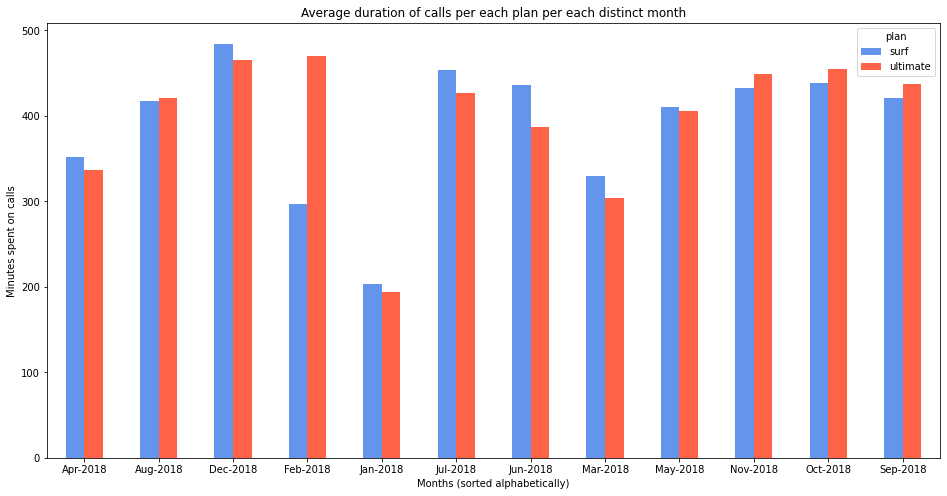

In [94]:
# Plot a bar plot to visualize - mean_calls_duration
mean_calls_duration.plot.bar(figsize=(16,8), rot=0, color=['CornflowerBlue', 'Tomato'])

# Set the plot attributes
plt.title('Average duration of calls per each plan per each distinct month')
plt.ylabel('Minutes spent on calls')
plt.xlabel('Months (sorted alphabetically)')

plt.show()

**Here are some possible conclusions that can be drawn from the data of the average duration of calls per month for Megaline's Surf and Ultimate prepaid plans**:

- Overall, customers on the Ultimate plan tend to have longer average call durations than those on the Surf plan, as seen in most of the months where both plans have data available.

- The difference in average call durations between the two plans varies from month to month, with some months having a larger gap (e.g., Feb-2018) and others having a smaller gap (e.g., May-2018).

- Both plans show a general trend of increasing average call durations from January to December, which could indicate a seasonal effect or a trend in customer behavior.

- The Surf plan appears to have more variation in its average call durations than the Ultimate plan.  

- The highest average duration of calls for both plans was in December 2018.

- It's worth noting that the data only shows the average duration of calls per month and doesn't account for other factors that could influence revenue, such as the number of calls made or the quality of the network.

#### Compare the number of minutes users of each plan require each month

Let's compare the number of minutes users of each plan require each month. In order to do that, let's first separate out the records of the two plans from `user_consumption_per_month` and store them in separate dataframes:

In [95]:
# Separate out the records of the two plans and store separately
surf_user_consumption_per_month = user_consumption_per_month[user_consumption_per_month['plan'] == 'surf']
ultimate_user_consumption_per_month = user_consumption_per_month[user_consumption_per_month['plan'] == 'ultimate']

Let's peek into the data of each of the new Dataframes:

In [96]:
# Get random 10 records from surf_user_consumption_per_month
surf_user_consumption_per_month.sample(n=10, random_state=100)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
2149,1472,Maximo Mendoza,Sep-2018,80.0,464.86,497.0,40.0,16.115986,17.0,surf,50,15360,500,20,10,0.03,0.03,15.0,40.00
823,1175,Shiloh Stafford,Dec-2018,72.0,573.49,609.0,36.0,16.298564,17.0,surf,50,15360,500,20,10,0.03,0.03,15.0,43.27
1637,1360,Arturo Mullins,Dec-2018,104.0,775.14,814.0,NaN,23.489814,24.0,surf,50,15360,500,20,10,0.03,0.03,15.0,119.42
2101,1464,Burt Burke,Dec-2018,93.0,593.44,629.0,27.0,18.255654,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,63.87
638,1138,Arlie Higgins,Oct-2018,66.0,445.03,469.0,7.0,23.221357,24.0,surf,50,15360,500,20,10,0.03,0.03,15.0,110.00
1388,1309,Winfred Zimmerman,Dec-2018,81.0,580.74,614.0,67.0,15.853223,16.0,surf,50,15360,500,20,10,0.03,0.03,15.0,33.93
422,1090,Brock Skinner,Dec-2018,45.0,270.02,286.0,31.0,14.001582,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
955,1203,Manie Grimes,May-2018,75.0,554.96,587.0,63.0,13.013174,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,23.00
1954,1425,Latrisha Larsen,Nov-2018,33.0,180.73,193.0,14.0,23.023828,24.0,surf,50,15360,500,20,10,0.03,0.03,15.0,110.00
178,1044,Devora Galloway,Oct-2018,33.0,161.69,172.0,45.0,20.151885,21.0,surf,50,15360,500,20,10,0.03,0.03,15.0,80.00


In [97]:
# Get random 10 records from ultimate_user_consumption_per_month
ultimate_user_consumption_per_month.sample(n=10, random_state=100)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
616,1133,Larry Barr,Dec-2018,43.0,247.07,259.0,85.0,12.148818,13.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1704,1373,Lindsey Dickerson,Nov-2018,113.0,785.85,827.0,66.0,26.710889,27.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1132,1247,Marion Singleton,Aug-2018,70.0,397.52,420.0,119.0,15.004375,16.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
2036,1445,Elodia Donovan,Jun-2018,65.0,502.26,528.0,11.0,14.458691,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
2066,1454,Kymberly Cohen,Oct-2018,35.0,246.17,260.0,80.0,22.905820,23.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1239,1264,Jessie Hill,Sep-2018,56.0,361.02,379.0,57.0,14.123418,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
611,1132,Edward Roberts,May-2018,113.0,724.76,769.0,149.0,29.462734,30.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1427,1317,Ruthanne Heath,Dec-2018,107.0,711.59,752.0,NaN,15.827158,16.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1840,1401,Charmain Bryant,Sep-2018,90.0,618.01,647.0,55.0,5.939697,6.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
613,1132,Edward Roberts,Oct-2018,92.0,625.25,663.0,153.0,22.084004,23.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0


Awesome! So, now we are prepared to plot histograms to compare the number of minutes users of each plan require each month:

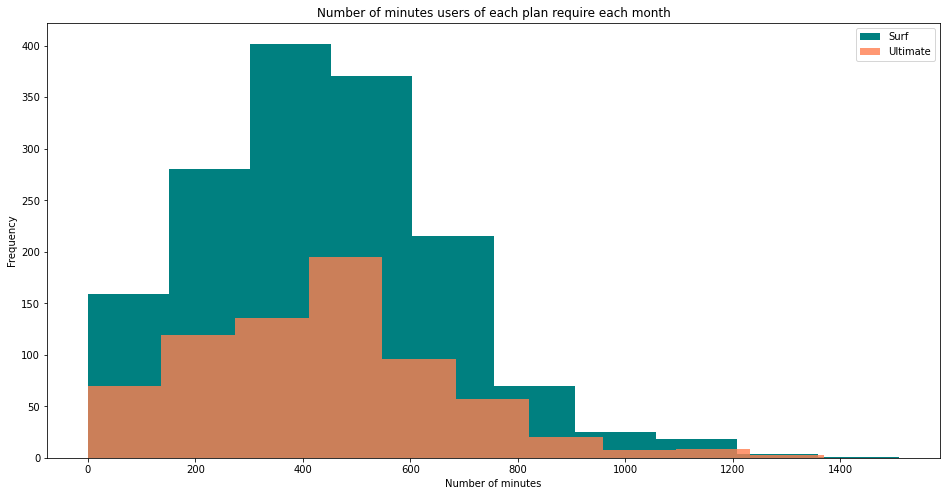

In [98]:
# Plot histograms to compare the number of minutes users of each plan require each month
surf_user_consumption_per_month['rounded_up_call_mins'].plot.hist(figsize=(16,8), color='Teal')
ultimate_user_consumption_per_month['rounded_up_call_mins'].plot.hist(color='Coral', alpha=0.8)

# Set the plot attributes
plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Number of minutes')
plt.title('Number of minutes users of each plan require each month')

plt.show()

After seeing the histogram, we could obvisouly figure out that surf plan has more users. Also, the users of both the surf and ultimate plans tend to spend mostly 300 to 600 minutes per month. But it's the ultimate plan users (even though less in numbers) who spend more time in minutes that the surf plan users.

#### Check whether users on the different plans have different behaviours for their calls

Let's calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls. Let's create a pivot table:

In [99]:
# Calculate the mean and the variance of the monthly call duration
monthly_call_duration_stats = user_consumption_per_month.pivot_table(index='plan', values='rounded_up_call_mins', aggfunc=['mean', 'var', 'std', 'median'])
monthly_call_duration_stats.columns = ['mean_monthly_call_mins', 'var_monthly_call_mins', 'std_monthly_call_mins', 'median_monthly_call_mins']
monthly_call_duration_stats

,mean_monthly_call_mins,var_monthly_call_mins,std_monthly_call_mins,median_monthly_call_mins
plan,,,,
surf,436.519741,52571.063243,229.283805,430.0
ultimate,434.676017,56573.632247,237.852123,425.0


**Here are some observations on users' behaviours based on the descriptive statistics data of Megaline's Surf and Ultimate plans**:

- The Surf plan has a slightly higher mean monthly call duration (436.52 minutes) than the Ultimate plan (434.68 minutes).

- The Surf plan has a slightly higher variance of monthly call duration (52,571.06 minutes) than the Ultimate plan (56,573.63 minutes).

- The Ultimate plan has a slightly lower standard deviation of monthly call duration (237.85 minutes) compared to the Surf plan (229.28 minutes).

- The median monthly call duration for both plans is relatively close, with Surf plan at 430.0 minutes and Ultimate plan at 425.0 minutes.

#### Visualize the distribution of the monthly call duration

Let's plot a box plot to visualize the distribution of the monthly call duration. But, before that, let's have quick refresh of what data our Dataframe - `user_consumption_per_month` holds:

In [100]:
user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


Now, let's get a subset of our data in the Dataframe - `user_consumption_per_month` that belongs to **Surf** plan users. We already have this data in `surf_user_consumption_per_month` Dataframe. So, let's see how the distribution looks for the monthly call distribution of the surf plan holders:

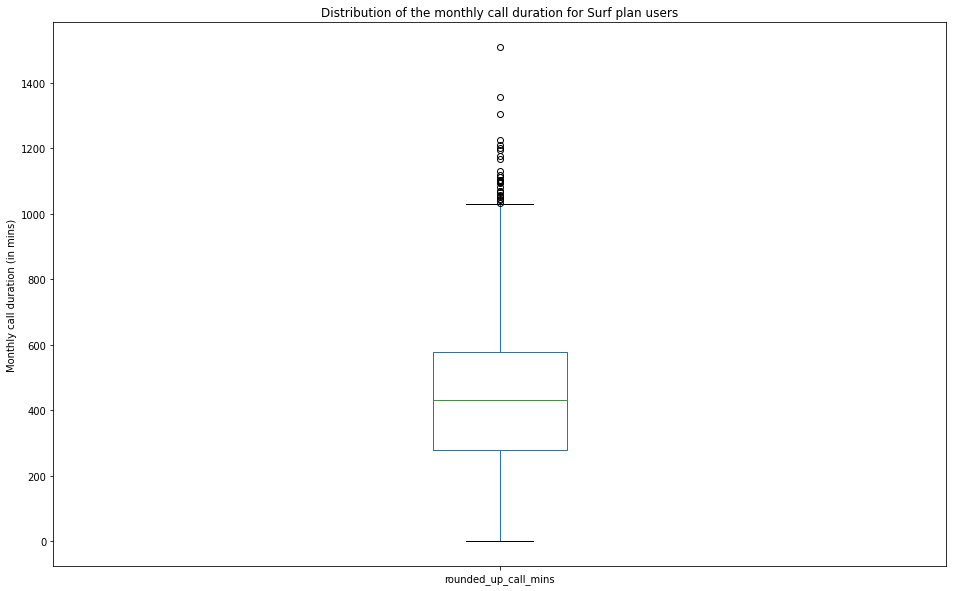

In [101]:
# Plot a boxplot to visualize the distribution of the monthly call distribution of the surf plan holders
surf_user_consumption_per_month['rounded_up_call_mins'].plot.box(figsize=(16,10))

# Set the plot attributes
plt.ylabel('Monthly call duration (in mins)')
plt.title('Distribution of the monthly call duration for Surf plan users')

plt.show()

Let's also get a descriptive statistics for the Series - `surf_user_consumption_per_month['rounded_up_call_mins']`:

In [102]:
surf_user_consumption_per_month['rounded_up_call_mins'].describe()

count    1545.000000
mean      436.519741
std       229.283805
min         0.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: rounded_up_call_mins, dtype: float64

Based on the given descriptive statistics data and the observations from the box plot, **we can conclude the following about the distribution of monthly call duration for Surf plan users**:

- **Count**: There are **1545 data points** or monthly call duration values available for Surf plan users.

- **Mean**: The average monthly call duration for Surf plan users is **436.52 minutes**.

- **Standard Deviation**: The standard deviation of monthly call duration for Surf plan users is 229.28 minutes. This indicates that there is a significant variation in monthly call duration among Surf plan users.

- **Minimum**: The minimum monthly call duration is **0 minutes**.

- **Maximum**: The maximum monthly call duration is **1510 minutes**. This indicates that some Surf plan users made very long calls during the month.  

- **Quartiles**: The 25th percentile of monthly call duration is 279 minutes, **the median (50th percentile) is 430 minutes**, and the 75th percentile is 579 minutes. These quartiles divide the data into four equal parts and provide insight into the distribution of monthly call duration for Surf plan users.  

- There are outliers or anomalies in the data. **1510 minutes** being the extreme maximum.

Overall, we can conclude that **the distribution of monthly call duration for Surf plan users is positively or slightly right skewed**, with a large range of variation in call duration. The majority of Surf plan users (50%) make calls that are less than 430 minutes per month, while some users make very long calls, up to a maximum of 1510 minutes per month.

Now, let's plot a box plot to viualize the monthwise distribution of the monthly call distribution of the surf plan holders:

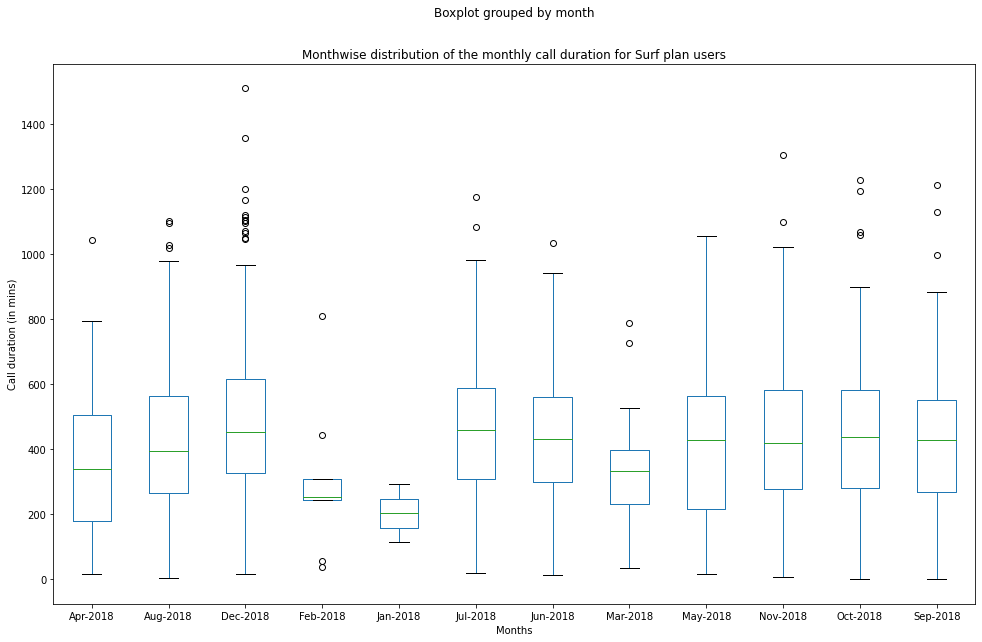

In [103]:
# Plot a boxplot to visualize the monthwise distribution of the monthly call distribution of the surf plan holders
surf_user_consumption_per_month.boxplot(by ='month', column =['rounded_up_call_mins'], grid = False, figsize=(16,10))

# Set the plot attributes
plt.ylabel('Call duration (in mins)')
plt.xlabel('Months')
plt.title('Monthwise distribution of the monthly call duration for Surf plan users')

plt.show()

Interesting! We can see that for Surf plan users:
- **The most extreme outliers lie in the month of December**. It's when users have talked the maximum.
- **There are no outliers in the month of January**. Also, the distribution for this month is symmetrical.

Now, let's get a subset of our data in the Dataframe - `user_consumption_per_month` that belongs to **Ultimate** plan users. We already have this data in `ultimate_user_consumption_per_month` Dataframe. So, let's see how the distribution looks for the monthly call distribution of the ultimate plan holders:

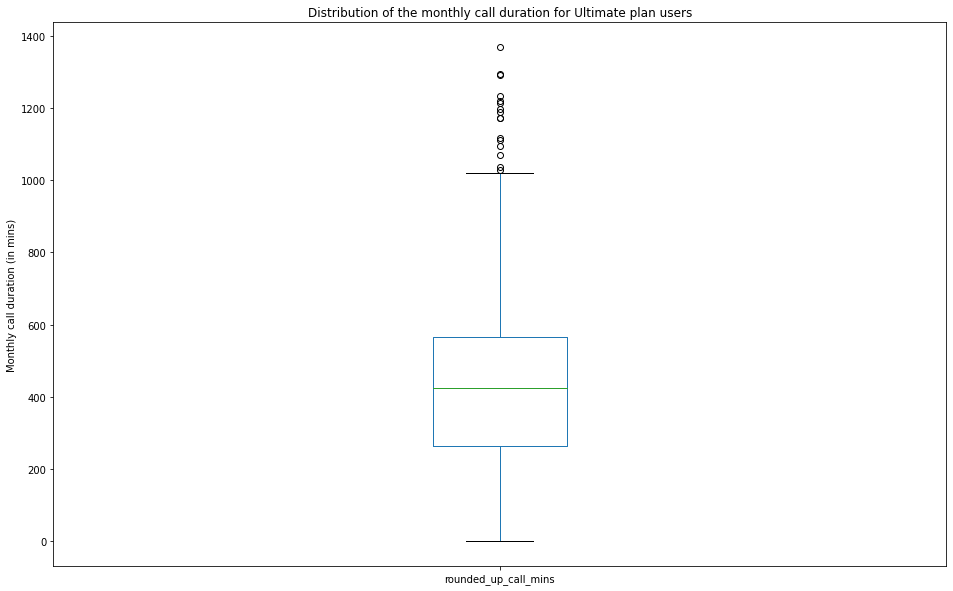

In [104]:
# Plot a boxplot to visualize the distribution of the monthly call distribution of the ultimate plan holders
ultimate_user_consumption_per_month['rounded_up_call_mins'].plot.box(figsize=(16,10))

# Set the plot attributes
plt.ylabel('Monthly call duration (in mins)')
plt.title('Distribution of the monthly call duration for Ultimate plan users')

plt.show()

Let's also get a descriptive statistics for the Series - `ultimate_user_consumption_per_month['rounded_up_call_mins']`:

In [105]:
ultimate_user_consumption_per_month['rounded_up_call_mins'].describe()

count     713.000000
mean      434.676017
std       237.852123
min         0.000000
25%       263.000000
50%       425.000000
75%       566.000000
max      1369.000000
Name: rounded_up_call_mins, dtype: float64

Based on the given descriptive statistics data and observations from the box plot, **we can conclude the following about the distribution of monthly call duration for Ultimate plan users**:

- **Count**: There are **713 data points** or monthly call duration values available.

- **Mean**: The average monthly call duration for Ultimate plan users is **434.68 minutes**.

- **Standard Deviation**: The standard deviation of monthly call duration for Ultimate plan users is **237.85 minutes**. This indicates that there is a significant variation in monthly call duration among Ultimate plan users.

- **Minimum**: The minimum monthly call duration is **0 minutes**.  

- **Maximum**: The maximum monthly call duration is **1369 minutes**. This indicates that some Ultimate plan users made very long calls during the month.

- **Quartiles**: The 25th percentile of monthly call duration is 263 minutes, **the median (50th percentile) is 425 minutes**, and the 75th percentile is 566 minutes. These quartiles divide the data into four equal parts and provide insight into the distribution of monthly call duration for Ultimate plan users.  

- There are outliers or anomalies in the data. **1369 minutes** being the extreme maximum.

Overall, we can conclude that **the distribution of monthly call duration for Ultimate plan users is positively skewed or slightly right skewed**, with a large range of variation in call duration. The majority of Ultimate plan users (50%) make calls that are less than 425 minutes per month, while some users make very long calls, up to a maximum of 1369 minutes per month. The mean monthly call duration for Ultimate plan users is slightly higher than that of Surf plan users, but the difference is not significant.

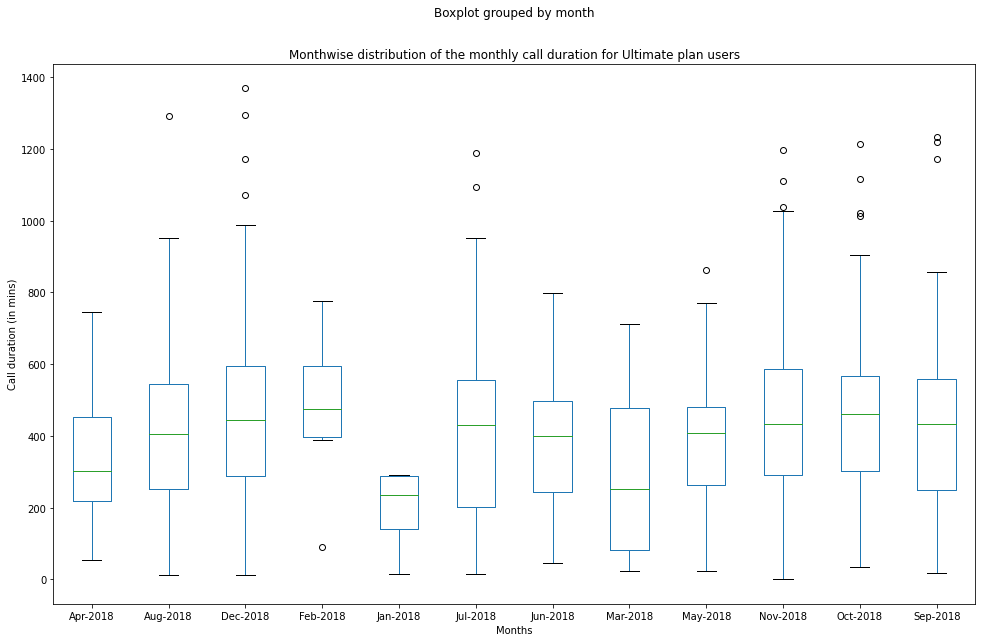

In [106]:
# Plot a boxplot to visualize the monthwise distribution of the monthly call distribution of the ultimate plan holders
ultimate_user_consumption_per_month.boxplot(by ='month', column =['rounded_up_call_mins'], grid = False, figsize=(16,10))

# Set the plot attributes
plt.ylabel('Call duration (in mins)')
plt.xlabel('Months')
plt.title('Monthwise distribution of the monthly call duration for Ultimate plan users')

plt.show()

Interesting! We can see that for Ultimate plan users:

- The most extreme outliers lie in the month of December. It's when users have talked the maximum. It's the same as for the Surf users.
- There are no symmetrical distributions for any month though.

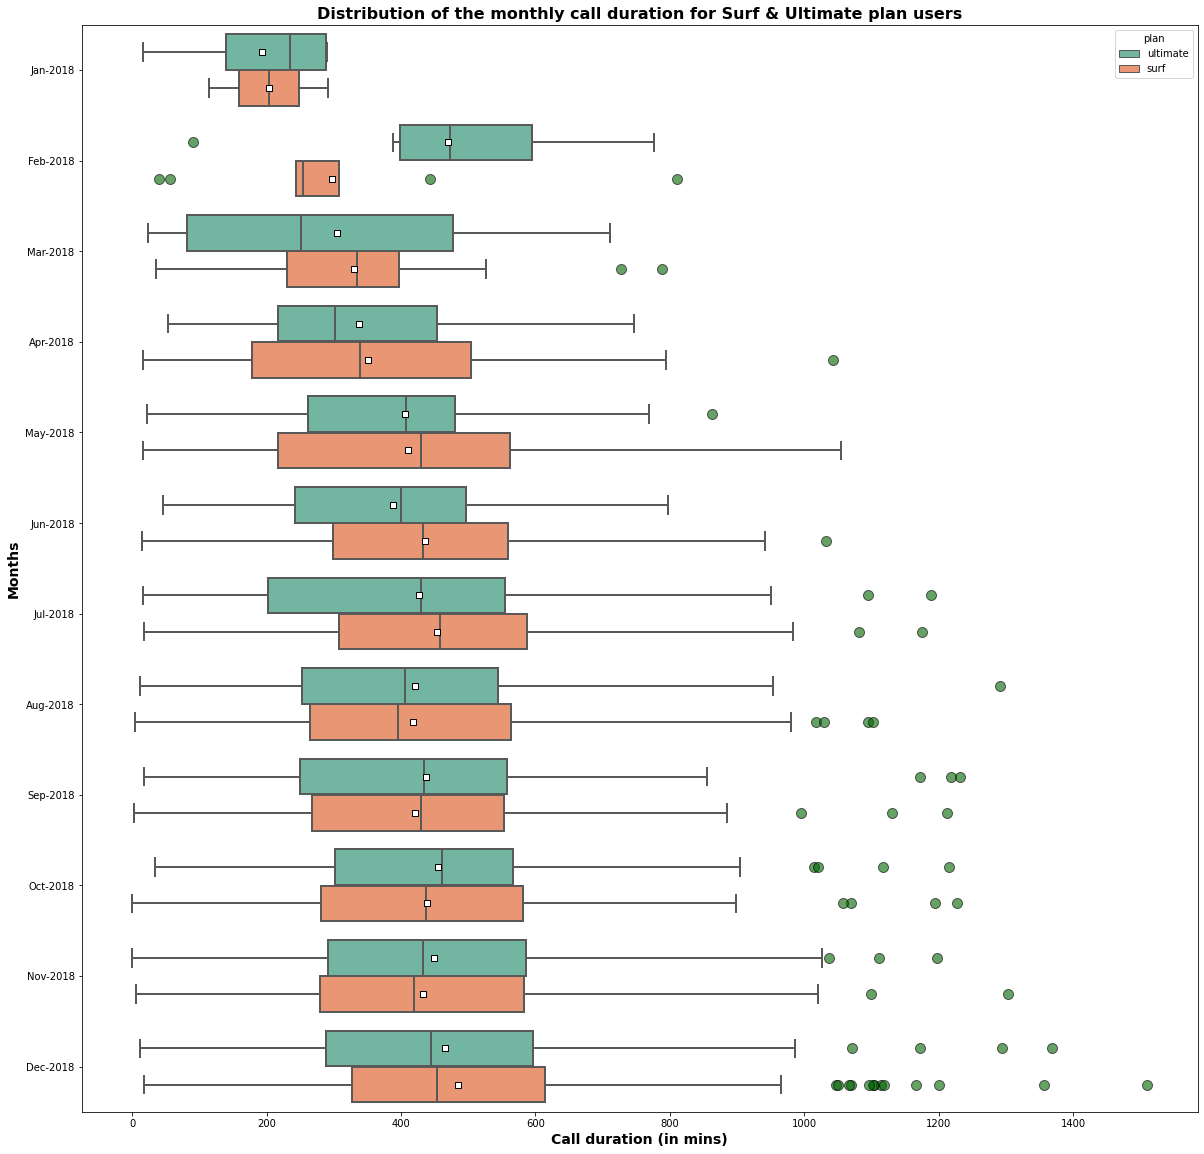

In [107]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Set the order in which months will be plotted on the graph
months_order = ['Jan-2018', 'Feb-2018', 'Mar-2018', 'Apr-2018', 'May-2018', 'Jun-2018', 'Jul-2018', 'Aug-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018', 'Dec-2018']

# Customize the markers that show outliers in the data
flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='darkgreen', alpha=0.6)

# Customize the markers that show mean values
meanprops = dict(marker='s', markerfacecolor='white', markeredgecolor='black')

plt.figure(figsize=(20,20))
my_plot = sns.boxplot(
    data=user_consumption_per_month,
    y='month',
    x='rounded_up_call_mins',
    hue='plan',
    order=months_order,
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='Set2')

# Set the plot attributes
my_plot.set_xlabel('Call duration (in mins)', fontsize= 14, fontweight='bold')
my_plot.set_ylabel('Months', fontsize= 14, fontweight='bold')
my_plot.set_title('Distribution of the monthly call duration for Surf & Ultimate plan users', fontsize= 16, fontweight='bold')

plt.show()

Wow! So, now we can compare the user behaviours between the two plans:
- Mostly all the users regardless of the plan they are in, talk less in the starting of the year but they tend to talk more as we progess towards the end of the year.
- In both the plans, December is the month when users have talked the most.
- We could notice the mean of the distribution by white colored square in the graph. There was high variation between plans in average call durations at the beginning of the year. The mean/median call durations are generally quite different from months 1-5. From months 6-12, the means, medians, overall distributions look very similar.

### Messages

Let's do some statistical study on the Messages. But, before proceeding, it will be great to refresh our memory with how the data under study looks like - `user_consumption_per_month`:

In [108]:
user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


#### Compare average number of messages per each plan per each distinct month

Let's compare average number of messages per each plan per each distinct month.

In [109]:
# Compare average number of messages per each plan per each distinct month 
mean_no_of_messages = user_consumption_per_month.pivot_table(index='month', columns='plan', aggfunc='mean', values='number_of_messages')
mean_no_of_messages

plan,surf,ultimate
month,,
Apr-2018,24.166667,28.937500
Aug-2018,37.596774,47.929825
Dec-2018,48.326772,53.936508
Feb-2018,21.600000,25.166667
Jan-2018,21.000000,20.666667
Jul-2018,35.945055,41.212766
Jun-2018,33.616438,36.289474
Mar-2018,21.937500,34.714286
May-2018,33.017857,44.333333


That's good. But, the mean has calculated the average values for number of messages per month in float. Since that doesn't make sense for **Number of Messages** column, we'll round the values to the nearest integer.

In [110]:
mean_no_of_messages['surf'] = mean_no_of_messages['surf'].round(0)
mean_no_of_messages['ultimate'] = mean_no_of_messages['ultimate'].round(0)
mean_no_of_messages

plan,surf,ultimate
month,,
Apr-2018,24.0,29.0
Aug-2018,38.0,48.0
Dec-2018,48.0,54.0
Feb-2018,22.0,25.0
Jan-2018,21.0,21.0
Jul-2018,36.0,41.0
Jun-2018,34.0,36.0
Mar-2018,22.0,35.0
May-2018,33.0,44.0


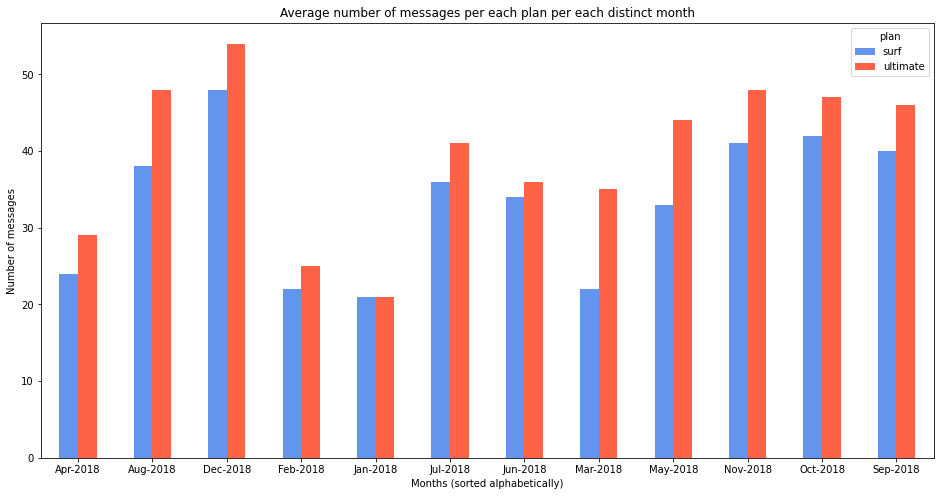

In [111]:
# Plot a bar plot to visualize - mean_no_of_messages
mean_no_of_messages.plot.bar(figsize=(16,8), rot=0, color=['CornflowerBlue', 'Tomato'])

# Set the plot attributes
plt.title('Average number of messages per each plan per each distinct month')
plt.ylabel('Number of messages')
plt.xlabel('Months (sorted alphabetically)')

plt.show()

Based on the visualization about **the average number of messages per month for Megaline's Surf and Ultimate prepaid plans, we can analyze and conclude the following**:

- In most months, **Ultimate plan users sent more average messages per month compared to Surf plan users**.
- The average number of messages sent per month was relatively consistent for Surf plan users throughout the year, with little variation.
- The average number of messages sent per month for Ultimate plan users had some fluctuations over time but showed an increasing trend overall.
- **The highest average number of messages sent per month for both plans was in December 2018**.
- There is a significant difference between the average number of messages sent per month by Surf and Ultimate plan users in some months (e.g., August 2018, May 2018, March 2018).
- **The average number of messages sent by both Surf and Ultimate plan users is relatively low**, with most months having an average of fewer than 50 messages per month.

#### Compare the number of messages users of each plan require each month

Let's compare the number of messages users of each plan require each month. We already have separated out the records of the two plans from `user_consumption_per_month` in `surf_user_consumption_per_month` and `ultimate_user_consumption_per_month`:

In [112]:
# Get first 10 records
surf_user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12
10,1004,Leonila Thompson,Aug-2018,49.0,334.86,354.0,25.0,27.325918,28.0,surf,50,15360,500,20,10,0.03,0.03,15.0,150.00


In [113]:
# Get first 10 records
ultimate_user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
19,1006,Jesusa Bradford,Dec-2018,9.0,54.79,59.0,139.0,31.366035,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,84.0
20,1006,Jesusa Bradford,Nov-2018,2.0,9.32,10.0,15.0,2.019893,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
26,1008,Emely Hoffman,Dec-2018,85.0,600.29,634.0,26.0,14.345049,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
27,1008,Emely Hoffman,Nov-2018,63.0,422.81,446.0,37.0,23.121797,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
28,1008,Emely Hoffman,Oct-2018,71.0,450.21,476.0,21.0,16.706045,17.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
46,1011,Halina Henry,Aug-2018,61.0,460.12,486.0,54.0,20.604854,21.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
47,1011,Halina Henry,Dec-2018,56.0,292.55,311.0,61.0,19.170537,20.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
48,1011,Halina Henry,Jul-2018,63.0,472.66,499.0,53.0,20.553135,21.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
49,1011,Halina Henry,Jun-2018,19.0,111.68,118.0,21.0,6.528428,7.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0


Awesome! So, now we are prepared to plot histograms to compare the number of messages users of each plan require each month:

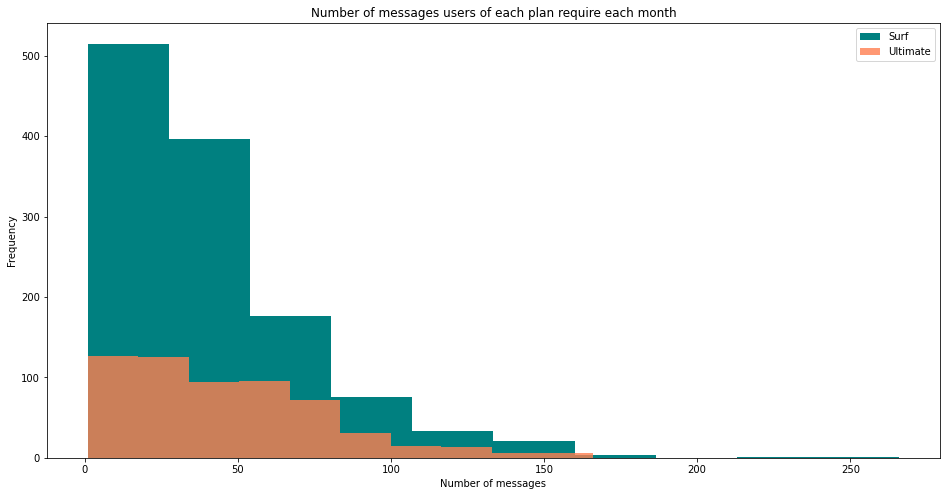

In [114]:
# Plot histograms to compare the number of minutes users of each plan require each month
surf_user_consumption_per_month['number_of_messages'].plot.hist(figsize=(16,8), color='Teal')
ultimate_user_consumption_per_month['number_of_messages'].plot.hist(color='Coral', alpha=0.8)

# Set the plot attributes
plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Number of messages')
plt.title('Number of messages users of each plan require each month')

plt.show()

We can conclude that:
- Users from both the plans don't need many messages per month.
- Majority of the users use less number of messages.
- The maximum number of messages needed by Surf plan users is close to 190.
- The maximum number of messages needed by Ultimate plan users is close to 170.

#### Check whether users on the different plans have different behaviours for their text messages

Let's calculate the mean and the variable of the number of messages to reason on whether users on the different plans have different behaviours for their calls. Let's create a pivot table:

In [115]:
# Calculate the mean and the variance of the monthly no of messages
monthly_no_of_messages_stats = user_consumption_per_month.pivot_table(index='plan', values='number_of_messages', aggfunc=['mean', 'var', 'std', 'median'])
monthly_no_of_messages_stats.columns = ['mean_monthly_no_of_messages', 'var_monthly_no_of_messages', 'std_monthly_no_of_messages', 'median_monthly_no_of_messages']
monthly_no_of_messages_stats

,mean_monthly_no_of_messages,var_monthly_no_of_messages,std_monthly_no_of_messages,median_monthly_no_of_messages
plan,,,,
surf,40.109656,1091.344231,33.035500,32.0
ultimate,46.296233,1085.183108,32.942118,41.0


**The descriptive statistics data of Megaline's Surf and Ultimate plans for monthly number of messages reveals the following information** about users on the different plans and their behaviors for the number of messages they use each month:

- The mean of the monthly number of messages is higher for Ultimate plan users than for Surf plan users, with Ultimate plan users sending an average of 46.30 messages per month compared to Surf plan users sending an average of 40.11 messages per month.
- The variance of the monthly number of messages is similar for both plans, indicating that **there is a similar degree of variability in the number of messages used each month by both Surf and Ultimate plan users**.
- The standard deviation of the monthly number of messages is similar for both plans, with Ultimate plan users having a slightly lower standard deviation than Surf plan users.
- **The median of the monthly number of messages is higher for Ultimate plan users than for Surf plan users**, with Ultimate plan users having a median of 41 messages per month compared to Surf plan users having a median of 32 messages per month.  

Based on the above statistics, **we can conclude that Ultimate plan users send more messages on average and have a higher median number of messages per month compared to Surf plan users**. Additionally, both plans have a similar degree of variability in the monthly number of messages sent, with Surf plan users having a slightly higher standard deviation.

#### Visualize the distribution of the monthly number of messages sent

Let's plot a box plot to visualize the distribution of the monthly number of messages sent. But, before that, let's have quick refresh of what data our Dataframe - `user_consumption_per_month` holds:

In [116]:
user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


Now, let's get a subset of our data in the Dataframe - `user_consumption_per_month` that belongs to **Surf** plan users. We already have this data in `surf_user_consumption_per_month` Dataframe. So, let's see how the distribution looks for the monthly number of messages sent for the surf plan holders:

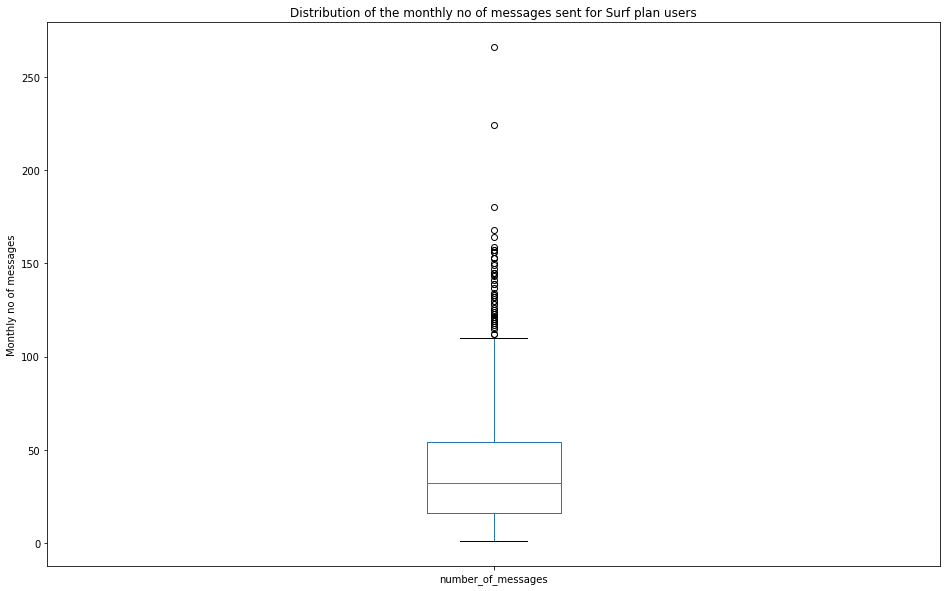

In [117]:
# Plot a boxplot to visualize the distribution of the monthly no of messages sent for the surf plan holders
surf_user_consumption_per_month['number_of_messages'].plot.box(figsize=(16,10))

# Set the plot attributes
plt.ylabel('Monthly no of messages')
plt.title('Distribution of the monthly no of messages sent for Surf plan users')

plt.show()

Let's also get a descriptive statistics for the Series - `surf_user_consumption_per_month['number_of_messages']`:

In [118]:
surf_user_consumption_per_month['number_of_messages'].describe()

count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: number_of_messages, dtype: float64

**Based on the given descriptive statistics data and the observations from the box plot, we can conclude the following about the distribution of monthly number of messages for Surf plan users**:

- **Count**: There are **1222 data points or monthly number of messages values** available.

- **Mean**: The average monthly number of messages for Surf plan users is **40.11 or 40 approximately**.

- **Standard Deviation**: The standard deviation of monthly number of messages for Surf plan users is **33.04**. This indicates that there is a significant variation in monthly number of messages among Surf plan users.

- **Minimum**: The minimum monthly number of messages is **1**. This indicates that **some users sent only one message during the month**.

- **Maximum**: The maximum monthly number of messages is **266**. This indicates that **some Surf plan users sent a large number of messages during the month**.

- **Quartiles**: The 25th percentile of monthly number of messages is 16, **the median (50th percentile) is 32**, and the 75th percentile is 54.  

- The distribution has many outliers, **266 being the maximum**.  

Overall, we can conclude that **the distribution of monthly number of messages for Surf plan users is positively skewed or right skewed**, with a large range of variation in the number of messages sent. **The majority of Surf plan users (50%) sent 32 or fewer messages per month, while some users sent up to 266 messages per month**. 

Now, let's plot a box plot to viualize the monthwise distribution of the number of messages sent for the surf plan holders:

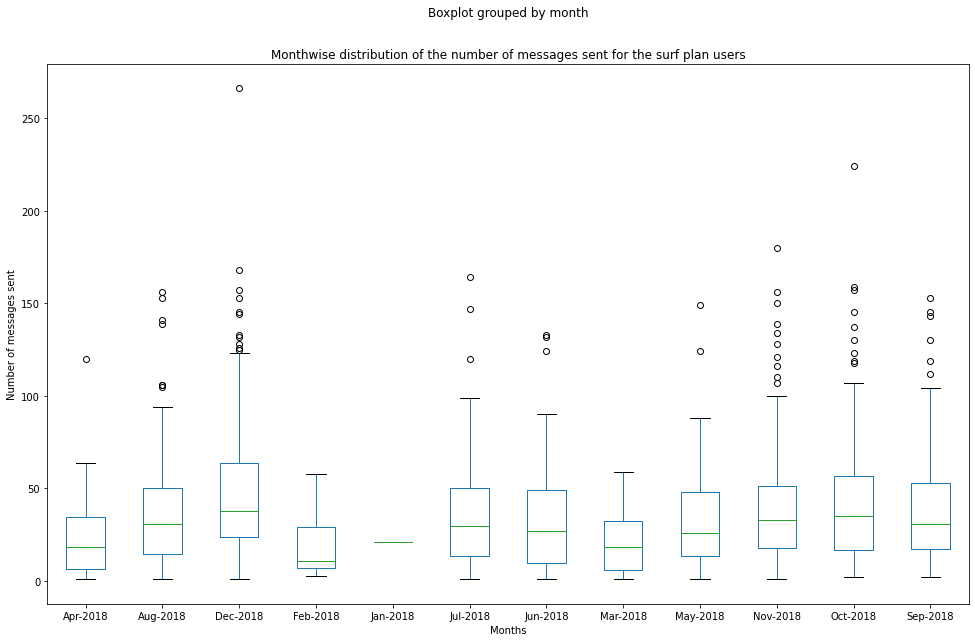

In [119]:
# Plot a boxplot to visualize the monthwise distribution of the number of messages sent for the surf plan holders
surf_user_consumption_per_month.boxplot(by ='month', column =['number_of_messages'], grid = False, figsize=(16,10))

# Set the plot attributes
plt.ylabel('Number of messages sent')
plt.xlabel('Months')
plt.title('Monthwise distribution of the number of messages sent for the surf plan users')

plt.show()

Interesting! We can see that for Surf plan users:
- **The most extreme outliers lie in the month of December**. It's when users have texted the maximum.
- **There are no outliers in the months of January, February and March**.

Now, let's get a subset of our data in the Dataframe - `user_consumption_per_month` that belongs to **Ultimate** plan users. We already have this data in `ultimate_user_consumption_per_month` Dataframe. So, let's see how the distribution looks for the monthly number of messages sent for the ultimate plan holders:

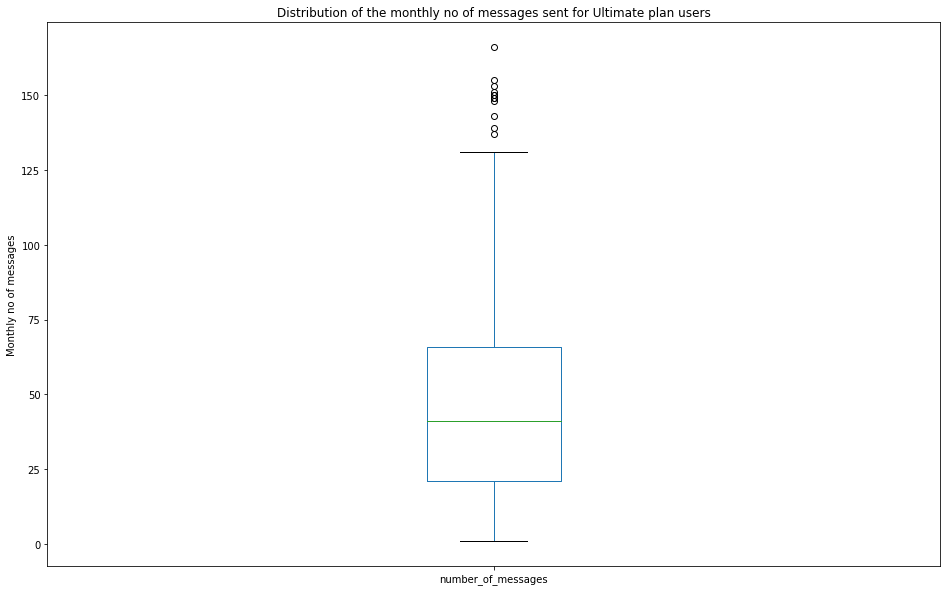

In [120]:
# Plot a boxplot to visualize the distribution of the monthly no of messages sent for the ultimate plan holders
ultimate_user_consumption_per_month['number_of_messages'].plot.box(figsize=(16,10))

# Set the plot attributes
plt.ylabel('Monthly no of messages')
plt.title('Distribution of the monthly no of messages sent for Ultimate plan users')

plt.show()

Let's also get a descriptive statistics for the Series - `ultimate_user_consumption_per_month['number_of_messages']`:

In [121]:
ultimate_user_consumption_per_month['number_of_messages'].describe()

count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: number_of_messages, dtype: float64

**Based on the given descriptive statistics data and the observations from the box plot, we can conclude the following about the distribution of monthly number of messages for Ultimate plan users**:

- **Count**: There are **584 data points or monthly number of messages values** available.

- **Mean**: The average monthly number of messages for Ultimate plan users is **46.30 or 46 approximately**.

- **Standard Deviation**: The standard deviation of monthly number of messages for Ultimate plan users is **32.94**. This indicates that there is a significant variation in monthly number of messages among Ultimate plan users.

- **Minimum**: The minimum monthly number of messages is **1**. **This indicates that some users sent only one message during the month**.

- **Maximum**: The maximum monthly number of messages is **166**. **This indicates that some Ultimate plan users sent a large number of messages during the month, but the maximum is lower than that of Surf plan users**.

- **Quartiles**: The 25th percentile of monthly number of messages is 21, **the median (50th percentile) is 41**, and the 75th percentile is 66. These quartiles divide the data into four equal parts and provide insight into the distribution of monthly number of messages for Ultimate plan users.  

- There are outliers in the distribution, **166** being the maximum.  

Overall, we can conclude that **the distribution of monthly number of messages for Ultimate plan users is positively skewed or right skewed**, with a large range of variation in the number of messages sent. **The majority of Ultimate plan users (50%) sent 41 or fewer messages per month, while some users sent up to 166 messages per month. The mean monthly number of messages for Ultimate plan users is slightly higher than that of Surf plan users**. However, the maximum monthly number of messages is lower for Ultimate plan users compared to Surf plan users.

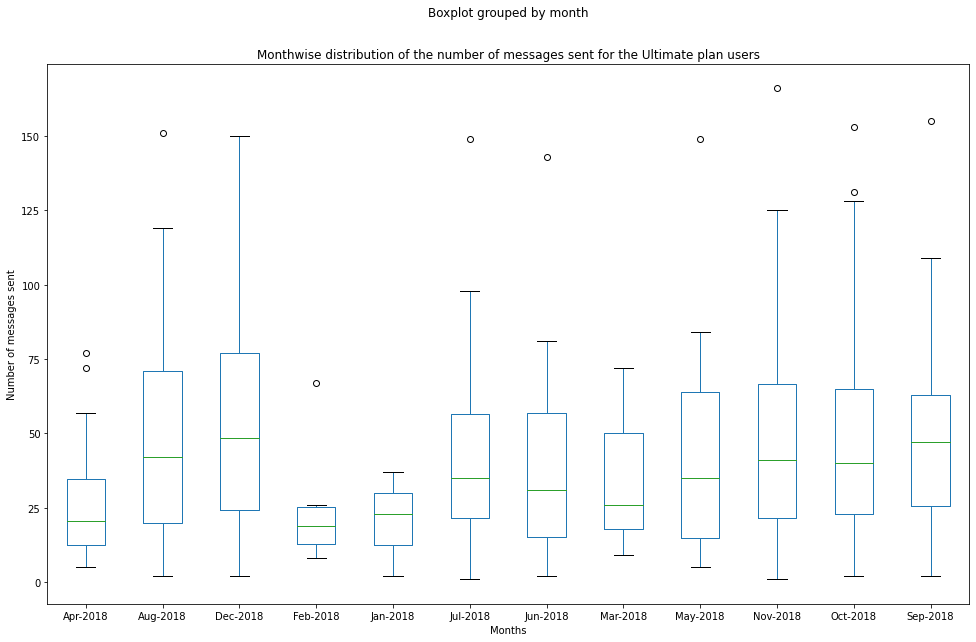

In [122]:
# Plot a boxplot to visualize the monthwise distribution of the number of messages sent for the ultimate plan holders
ultimate_user_consumption_per_month.boxplot(by ='month', column =['number_of_messages'], grid = False, figsize=(16,10))

# Set the plot attributes
plt.ylabel('Number of messages sent')
plt.xlabel('Months')
plt.title('Monthwise distribution of the number of messages sent for the Ultimate plan users')

plt.show()

Interesting! We can see that for Ultimate plan users:
- **The most extreme outliers lie in the month of November**. It's when users have texted the maximum.
- **There are no outliers in the months of January, March and December**.

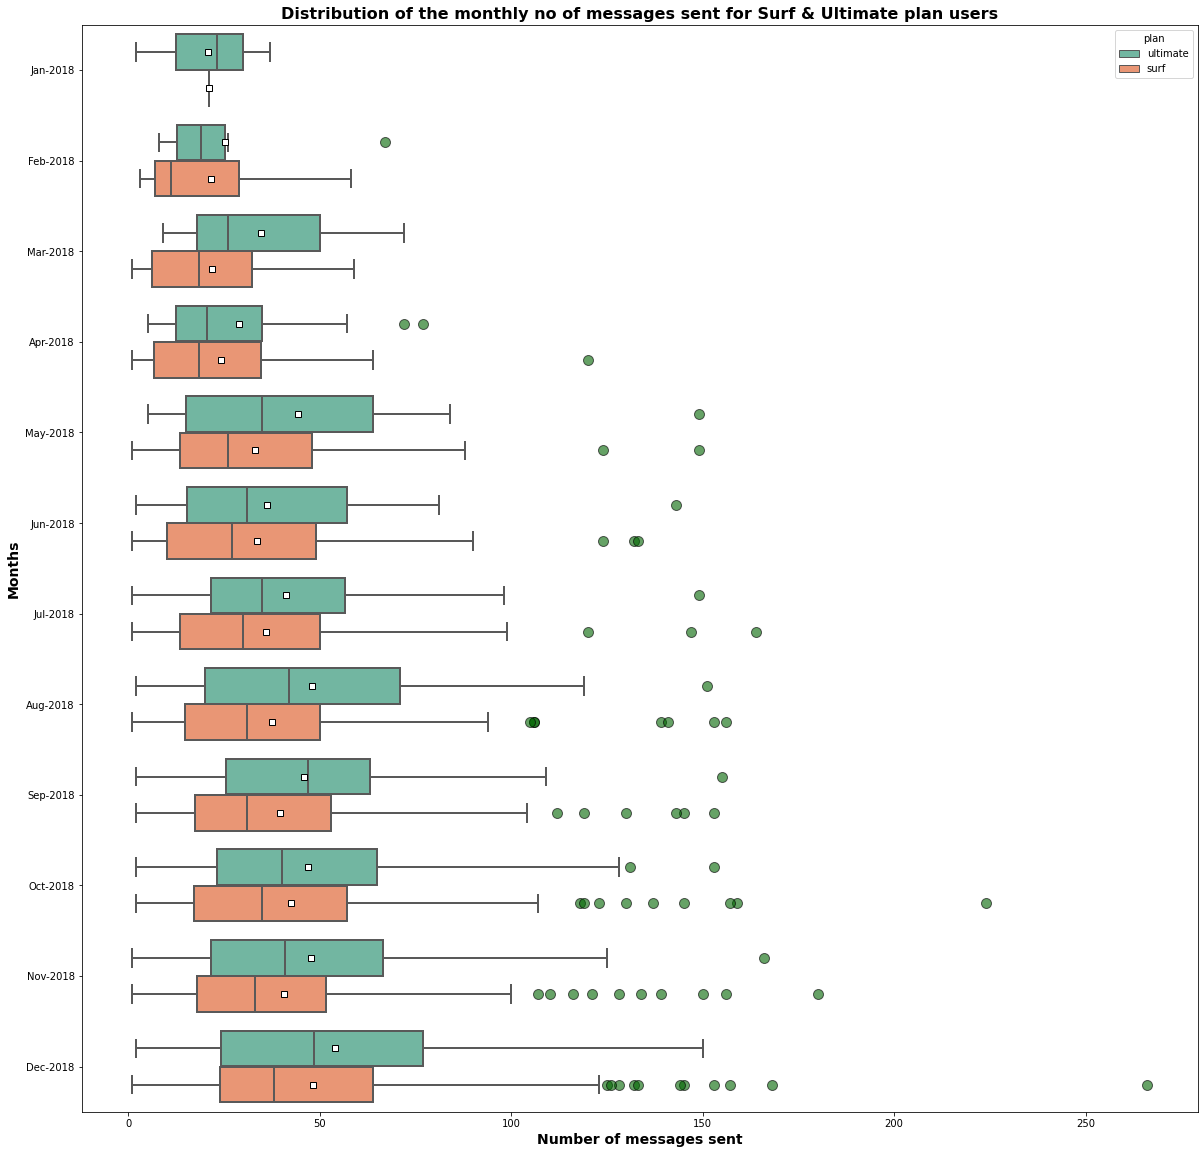

In [123]:
# Plot a boxplot to visualize the distribution of the monthly no of messages sent by users

# Set the order in which months will be plotted on the graph
months_order = ['Jan-2018', 'Feb-2018', 'Mar-2018', 'Apr-2018', 'May-2018', 'Jun-2018', 'Jul-2018', 'Aug-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018', 'Dec-2018']

# Customize the markers that show outliers in the data
flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='darkgreen', alpha=0.6)

# Customize the markers that show mean values
meanprops = dict(marker='s', markerfacecolor='white', markeredgecolor='black')

plt.figure(figsize=(20,20))
my_plot = sns.boxplot(
    data=user_consumption_per_month,
    y='month',
    x='number_of_messages',
    hue='plan',
    order=months_order,
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='Set2')

# Set the plot attributes
my_plot.set_xlabel('Number of messages sent', fontsize= 14, fontweight='bold')
my_plot.set_ylabel('Months', fontsize= 14, fontweight='bold')
my_plot.set_title('Distribution of the monthly no of messages sent for Surf & Ultimate plan users', fontsize= 16, fontweight='bold')

plt.show()

Wow! So, now we can compare the user behaviours between the two plans:
- Mostly all the users regardless of the plan they are in, message less in the starting of the year but they tend to message more as we progess towards the end of the year.
- In the Surf plan, December is the month when users have messaged the most and in the Ultimate plan, November is the month when users have messaged the most.

### Internet

Let's do some statistical study on the Internet. But, before proceeding, it will be great to refresh our memory with how the data under study looks like - `user_consumption_per_month`:

In [124]:
# Get first 10 records
user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


#### Compare average amount of internet traffic consumed by users per each plan per each distinct month

Let's compare average amount of internet traffic consumed by users (in GBs) per each plan per each distinct month.

In [125]:
# Compare average amount of internet traffic consumed by users per each plan per each distinct month  
mean_internet_traffic_consumed = user_consumption_per_month.pivot_table(index='month', columns='plan', aggfunc='mean', values='rounded_up_gb_used')
mean_internet_traffic_consumed

plan,surf,ultimate
month,,
Apr-2018,12.469388,16.333333
Aug-2018,17.201258,17.845070
Dec-2018,18.296530,18.397351
Feb-2018,12.222222,17.285714
Jan-2018,5.000000,7.250000
Jul-2018,17.016667,16.491525
Jun-2018,15.810526,15.425532
Mar-2018,13.565217,18.416667
May-2018,14.302632,16.862069


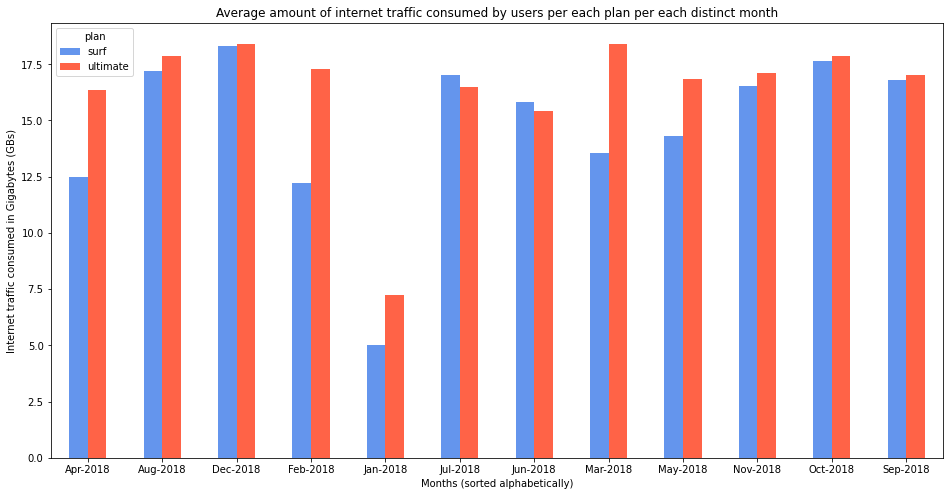

In [126]:
# Plot a bar plot to visualize - mean_internet_traffic_consumed
mean_internet_traffic_consumed.plot.bar(figsize=(16,8), rot=0, color=['CornflowerBlue', 'Tomato'])

# Set the plot attributes
plt.title('Average amount of internet traffic consumed by users per each plan per each distinct month')
plt.ylabel('Internet traffic consumed in Gigabytes (GBs)')
plt.xlabel('Months (sorted alphabetically)')

plt.show()

**From the given data and the plot about the average amount of internet traffic consumed by users per each plan per each distinct month, we can conclude the following**:  
- Both plans show a similar pattern in internet usage over time, with higher consumption during the later months of the year (Oct, Nov, Dec) and lower consumption during the early months (Jan, Feb, Mar).
- January appears to be the month with the least amount of internet usage for both plans.
- The difference in average internet usage between the two plans is not significant, with only about a 2-3 GB difference on average.

#### Compare the number of internet GBs users of each plan require each month

Let's compare the number of internet GBs users of each plan require each month. We already have separated out the records of the two plans from `user_consumption_per_month` in `surf_user_consumption_per_month` and `ultimate_user_consumption_per_month`:

In [127]:
# Get first 10 records for surf users
surf_user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12
10,1004,Leonila Thompson,Aug-2018,49.0,334.86,354.0,25.0,27.325918,28.0,surf,50,15360,500,20,10,0.03,0.03,15.0,150.00


In [128]:
# Get first 10 records for ultimate users
ultimate_user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
19,1006,Jesusa Bradford,Dec-2018,9.0,54.79,59.0,139.0,31.366035,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,84.0
20,1006,Jesusa Bradford,Nov-2018,2.0,9.32,10.0,15.0,2.019893,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
26,1008,Emely Hoffman,Dec-2018,85.0,600.29,634.0,26.0,14.345049,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
27,1008,Emely Hoffman,Nov-2018,63.0,422.81,446.0,37.0,23.121797,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
28,1008,Emely Hoffman,Oct-2018,71.0,450.21,476.0,21.0,16.706045,17.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
46,1011,Halina Henry,Aug-2018,61.0,460.12,486.0,54.0,20.604854,21.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
47,1011,Halina Henry,Dec-2018,56.0,292.55,311.0,61.0,19.170537,20.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
48,1011,Halina Henry,Jul-2018,63.0,472.66,499.0,53.0,20.553135,21.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
49,1011,Halina Henry,Jun-2018,19.0,111.68,118.0,21.0,6.528428,7.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.0


Awesome! So, now we are prepared to plot histograms to compare the number of internet GBs users of each plan require each month:

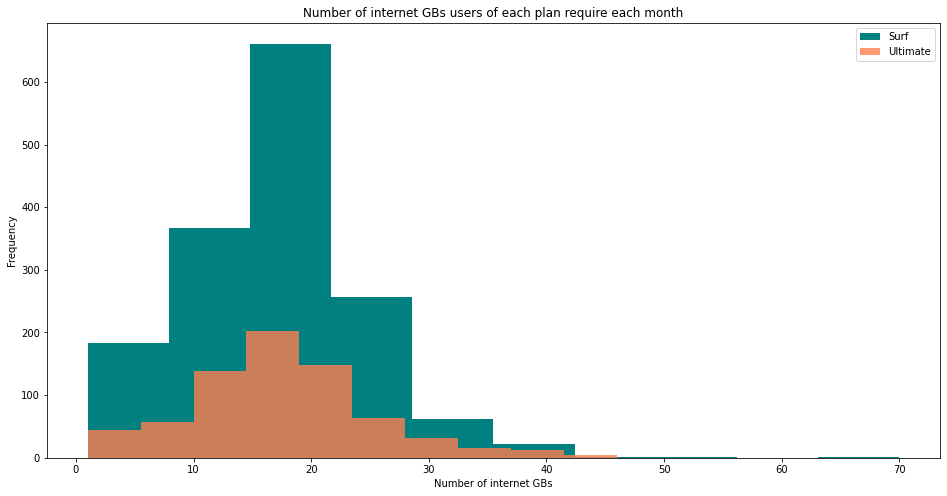

In [129]:
# Plot histograms to compare the number of internet GBs users of each plan require each month
surf_user_consumption_per_month['rounded_up_gb_used'].plot.hist(figsize=(16,8), color='Teal')
ultimate_user_consumption_per_month['rounded_up_gb_used'].plot.hist(color='Coral', alpha=0.8)

# Set the plot attributes
plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Number of internet GBs')
plt.title('Number of internet GBs users of each plan require each month')

plt.show()

We can conclude that:  
- Majority of the users in both the plans use somewhere between 15 to 22 GBs of internet each month.
- The maximum number of internet GBs needed by Surf plan users is close to 42.
- The maximum number of internet GBs needed by Ultimate plan users is close to 46.

#### Check whether users on the different plans have different behaviours for their internet traffic consumption

Let's calculate the mean and the variable of the number of internet GBs used to reason on whether users on the different plans have different behaviours for their internet traffic consumption. Let's create a pivot table:

In [130]:
# Calculate the mean and the variance of the monthly internet traffic consumption in GBs
monthly_internet_traffic_stats = user_consumption_per_month.pivot_table(index='plan', values='rounded_up_gb_used', aggfunc=['mean', 'var', 'std', 'median'])
monthly_internet_traffic_stats.columns = ['mean_monthly_internet_GBs', 'var_monthly_internet_GBs', 'std_monthly_internet_GBs', 'median_monthly_internet_GBs']
monthly_internet_traffic_stats

,mean_monthly_internet_GBs,var_monthly_internet_GBs,std_monthly_internet_GBs,median_monthly_internet_GBs
plan,,,,
surf,16.831194,59.473734,7.711922,17.0
ultimate,17.331015,58.494733,7.648185,17.0


Based on the descriptive statistics data provided, we can conclude the following about the internet traffic consumption of users on the Surf and Ultimate plans:

- The mean monthly internet traffic consumption for both plans is relatively similar, with Surf users consuming an average of 16.83 GBs and Ultimate users consuming an average of 17.33 GBs.
- The variance and standard deviation for monthly internet traffic consumption are also quite similar for both plans.
- The median monthly internet traffic consumption for both plans is identical at 17 GBs.
- The standard deviation is relatively small for both plans, indicating that the data is clustered around the mean and there is not a large amount of variability in internet traffic consumption among users on each plan.  

Overall, these statistics suggest that **users on both plans consume similar amounts of internet traffic on average, with relatively little variation among users within each plan**.

#### Visualize the distribution of the monthly internet traffic consumption by users

Let's plot a box plot to visualize the distribution of the monthly internet traffic consumption by users. But, before that, let's have quick refresh of what data our Dataframe - `user_consumption_per_month` holds:

In [131]:
user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


Now, let's get a subset of our data in the Dataframe - `user_consumption_per_month` that belongs to **Surf** plan users. We already have this data in `surf_user_consumption_per_month` Dataframe. So, let's see how the distribution looks for the monthly internet traffic consumption by the surf plan holders:

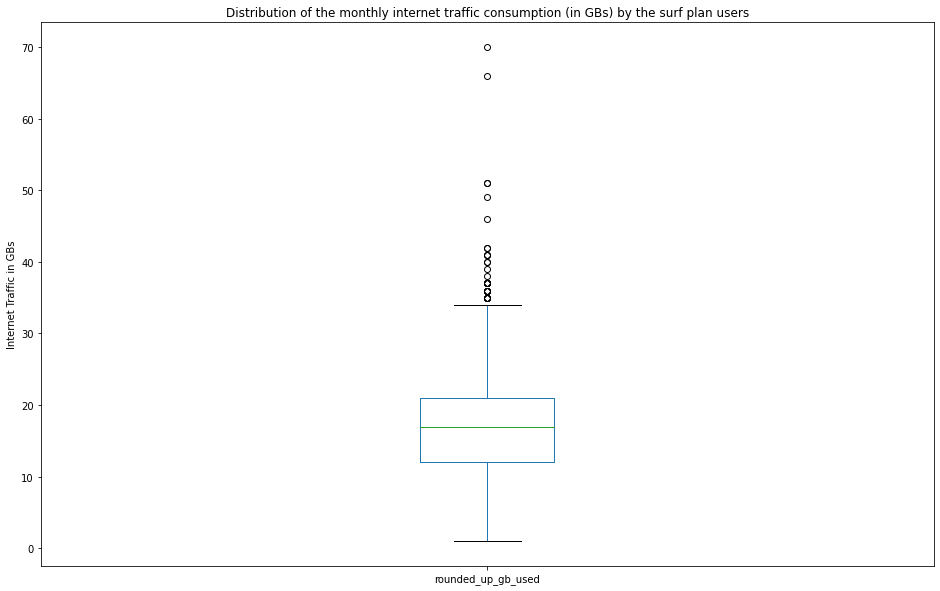

In [132]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic consumption by the surf plan holders
surf_user_consumption_per_month['rounded_up_gb_used'].plot.box(figsize=(16,10))

# Set the plot attributes
plt.ylabel('Internet Traffic in GBs')
plt.title('Distribution of the monthly internet traffic consumption (in GBs) by the surf plan users')

plt.show()

Let's also get a descriptive statistics for the Series - `surf_user_consumption_per_month['rounded_up_gb_used']`:

In [133]:
surf_user_consumption_per_month['rounded_up_gb_used'].describe()

count    1558.000000
mean       16.831194
std         7.711922
min         1.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: rounded_up_gb_used, dtype: float64

**Based on the given descriptive statistics data and the observations from the box plot above, we can conclude the following about the distribution of monthly internet traffic consumption for Surf plan users**:

- **Count**: There are **1558 data points** or monthly internet traffic consumption values available.

- **Mean**: The average monthly internet traffic consumption for Surf plan users is **16.83 GB**.

- **Standard Deviation**: The standard deviation of monthly internet traffic consumption for Surf plan users is **7.71 GB**. This indicates that there is a significant variation in monthly internet traffic consumption among Surf plan users.

- **Minimum**: The minimum monthly internet traffic consumption is **1 GB**. This indicates that some users consumed very little internet traffic during the month.

- **Maximum**: The maximum monthly internet traffic consumption is **70 GB**. This indicates that some Surf plan users consumed a large amount of internet traffic during the month.

- **Quartiles**: The 25th percentile of monthly internet traffic consumption is 12 GB, **the median (50th percentile) is 17 GB**, and the 75th percentile is 21 GB.  

- There are many outliers in the distribution, **70 GB** being the maximum.

Overall, we can conclude that **the distribution of monthly internet traffic consumption for Surf plan users is positively skewed or right skewed**, with a large range of variation in the amount of internet traffic consumed. **The majority of Surf plan users (50%) consumed between 12 GB and 21 GB of internet traffic per month**, while some users consumed as little as 1 GB and as much as 70 GB. 

Now, let's plot a box plot to visualize the monthwise distribution of internet traffic consumption (in GBs) for the surf plan holders:

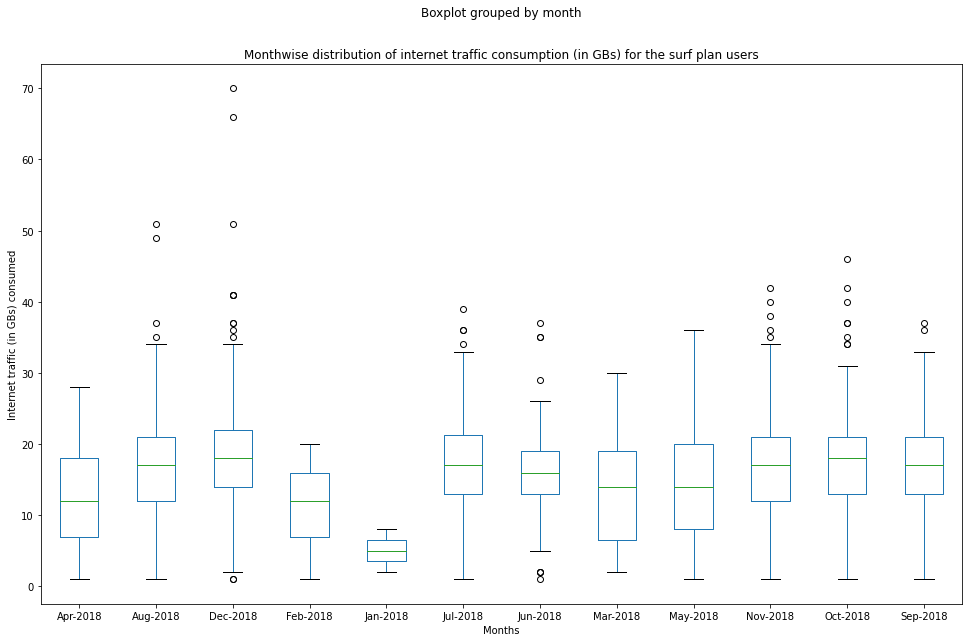

In [134]:
# Plot a boxplot to visualize the monthwise distribution of internet traffic consumption (in GBs) for the surf plan holders
surf_user_consumption_per_month.boxplot(by ='month', column =['rounded_up_gb_used'], grid = False, figsize=(16,10))

# Set the plot attributes
plt.ylabel('Internet traffic (in GBs) consumed')
plt.xlabel('Months')
plt.title('Monthwise distribution of internet traffic consumption (in GBs) for the surf plan users')

plt.show()

Interesting! We can see that for Surf plan users:
- **The most extreme outliers lie in the month of December**. It's when users have used internet the most.
- **There are no outliers in the months of January, February, March and April**.

Now, let's get a subset of our data in the Dataframe - `user_consumption_per_month` that belongs to **Ultimate** plan users. We already have this data in `ultimate_user_consumption_per_month` Dataframe. So, let's see how the distribution looks for the monthly internet traffic consumption by the Ultimate plan holders::

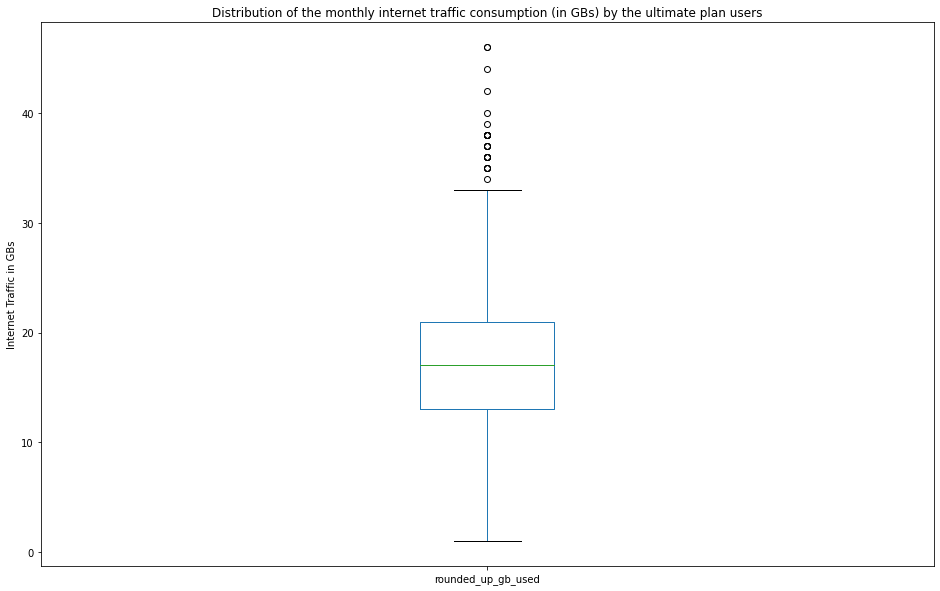

In [135]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic consumption by the ultimate plan holders
ultimate_user_consumption_per_month['rounded_up_gb_used'].plot.box(figsize=(16,10))

# Set the plot attributes
plt.ylabel('Internet Traffic in GBs')
plt.title('Distribution of the monthly internet traffic consumption (in GBs) by the ultimate plan users')

plt.show()

Let's also get a descriptive statistics for the Series - `ultimate_user_consumption_per_month['rounded_up_gb_used']`:

In [136]:
ultimate_user_consumption_per_month['rounded_up_gb_used'].describe()

count    719.000000
mean      17.331015
std        7.648185
min        1.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: rounded_up_gb_used, dtype: float64

**Based on the given descriptive statistics data and the observations from the box plot, we can conclude the following about the distribution of monthly internet traffic consumption for Ultimate plan users**:

- **Count**: There are **719 data points** or monthly internet traffic consumption values available.

- **Mean**: The average monthly internet traffic consumption for Ultimate plan users is **17.33 GB**.

- **Standard Deviation**: The standard deviation of monthly internet traffic consumption for Ultimate plan users is **7.65 GB**. This indicates that there is a significant variation in monthly internet traffic consumption among Ultimate plan users.

- **Minimum**: The minimum monthly internet traffic consumption is **1 GB**. This indicates that some users consumed very little internet traffic during the month.

- **Maximum**: The maximum monthly internet traffic consumption is **46 GB**. This indicates that some Ultimate plan users consumed a large amount of internet traffic during the month, but not as much as some Surf plan users.

- **Quartiles**: The 25th percentile of monthly internet traffic consumption is 13 GB, **the median (50th percentile) is 17 GB**, and the 75th percentile is 21 GB. These quartiles divide the data into four equal parts and provide insight into the distribution of monthly internet traffic consumption for Ultimate plan users.  

- There are many outliers in the distribution, **46GB** beign the maxixmum.  

Overall, we can conclude that **the distribution of monthly internet traffic consumption for Ultimate plan users is also slightly positively skewed or very slighty right skewed (Mean - 17.33 GB > Median 17GB)**. **The majority of Ultimate plan users (50%) consumed between 13 GB and 21 GB of internet traffic per month, while some users consumed as little as 1 GB and as much as 46 GB**. The mean monthly internet traffic consumption for Ultimate plan users is 17.33 GB, which is slightly higher than the mean consumption for Surf plan users. However, the difference is not very significant.

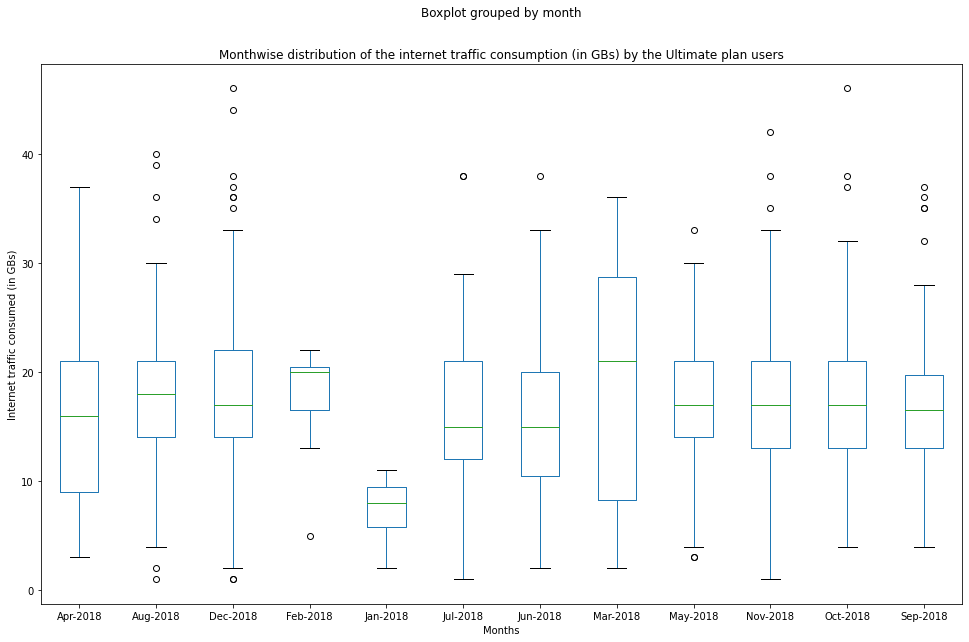

In [137]:
# Plot a boxplot to visualize the monthwise distribution of the internet traffic consumption (in GBs) by the ultimate plan holders
ultimate_user_consumption_per_month.boxplot(by ='month', column =['rounded_up_gb_used'], grid = False, figsize=(16,10))

# Set the plot attributes
plt.ylabel('Internet traffic consumed (in GBs)')
plt.xlabel('Months')
plt.title('Monthwise distribution of the internet traffic consumption (in GBs) by the Ultimate plan users')

plt.show()

Interesting! We can see that for Ultimate plan users:

- The most extreme outliers lie in the months of December and October. It's when users have used internet the most.
- There are no outliers in the months of January, March and April.

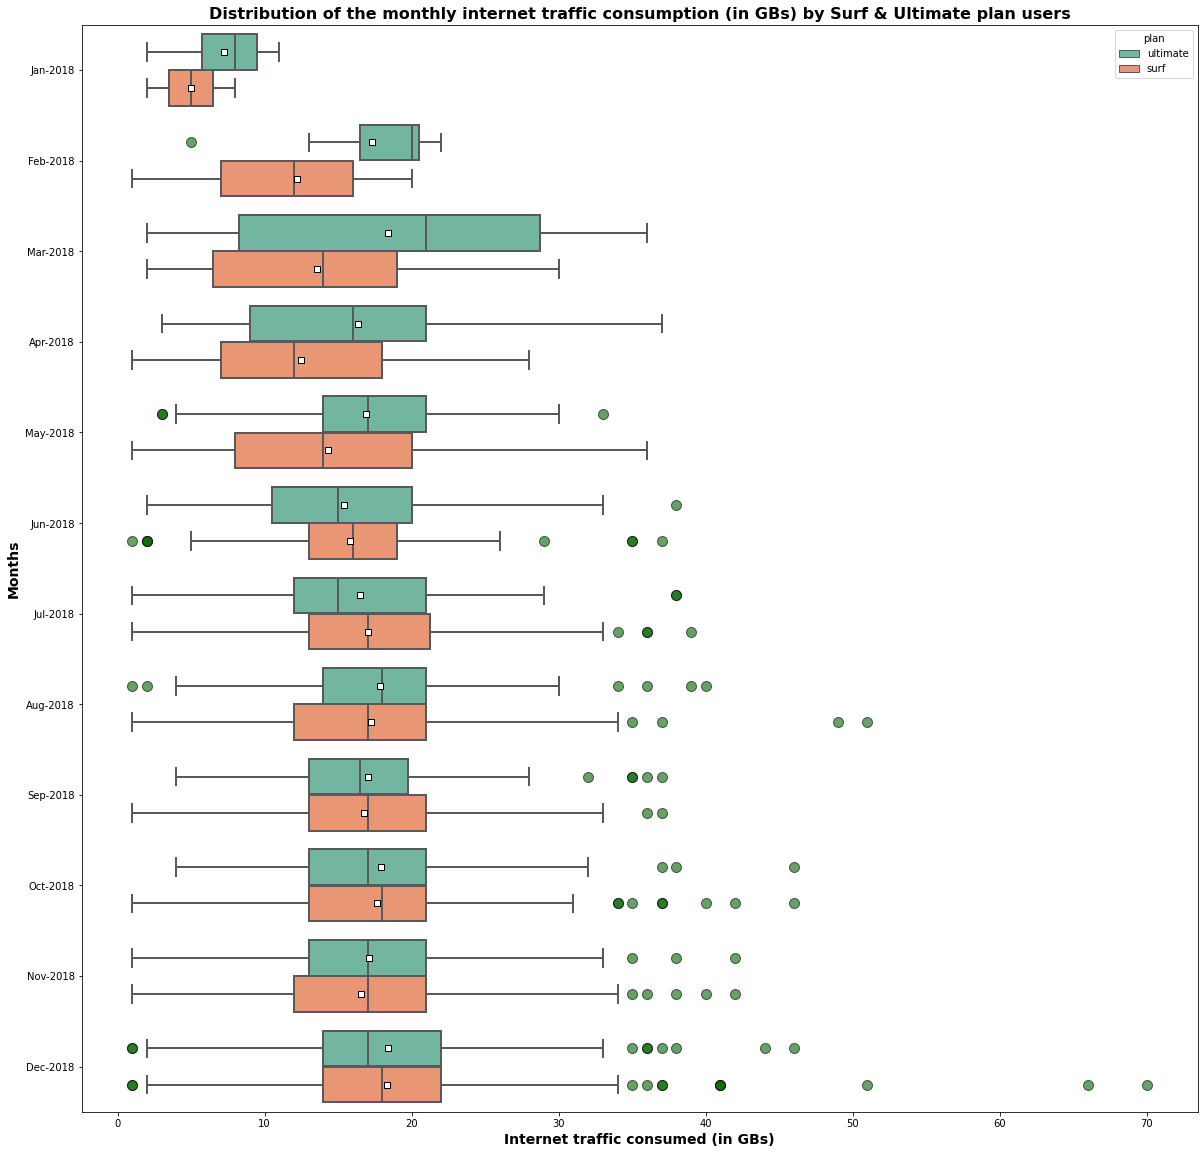

In [138]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic consumption (in GBs) by users

# Set the order in which months will be plotted on the graph
months_order = ['Jan-2018', 'Feb-2018', 'Mar-2018', 'Apr-2018', 'May-2018', 'Jun-2018', 'Jul-2018', 'Aug-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018', 'Dec-2018']

# Customize the markers that show outliers in the data
flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='darkgreen', alpha=0.6)

# Customize the markers that show mean values
meanprops = dict(marker='s', markerfacecolor='white', markeredgecolor='black')

plt.figure(figsize=(20,20))
my_plot = sns.boxplot(
    data=user_consumption_per_month,
    y='month',
    x='rounded_up_gb_used',
    hue='plan',
    order=months_order,
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='Set2')

# Set the plot attributes
my_plot.set_xlabel('Internet traffic consumed (in GBs)', fontsize= 14, fontweight='bold')
my_plot.set_ylabel('Months', fontsize= 14, fontweight='bold')
my_plot.set_title('Distribution of the monthly internet traffic consumption (in GBs) by Surf & Ultimate plan users', fontsize= 16, fontweight='bold')

plt.show()

Wow! So, now we can compare the user behaviours between the two plans:

- Mostly all the users regardless of the plan they are in, the internet usage is less in the starting of the year but they tend to use internet more as we progess towards the end of the year.
- In the Surf plan, December is the month when users have messaged the most and in the Ultimate plan, December and October are the month when users have used internet the most.

<div style="border-bottom:2px solid #058EE1;"></div>

## Study Revenue <a id='study-revenue'></a>  
[Back to Contents](#contents)

Let's do some statistical study on the Revenue. But, before proceeding, it will be great to refresh our memory with how the data under study looks like - `user_consumption_per_month`:

In [139]:
# Get the first 10 records
user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


#### Compare average revenue per each plan per each distinct month

Let's compare average revenue per each plan per each distinct month.

In [140]:
# Compare average revenue per each plan per each distinct month  
mean_revenue = user_consumption_per_month.pivot_table(index='month', columns='plan', aggfunc='mean', values='usd_monthly_revenue')
mean_revenue

plan,surf,ultimate
month,,
Apr-2018,40.710600,73.000000
Aug-2018,63.931173,72.859155
Dec-2018,70.557044,73.291391
Feb-2018,34.396667,70.000000
Jan-2018,20.000000,70.000000
Jul-2018,62.674050,71.898305
Jun-2018,49.276289,71.638298
Mar-2018,45.941304,74.666667
May-2018,47.628182,70.724138


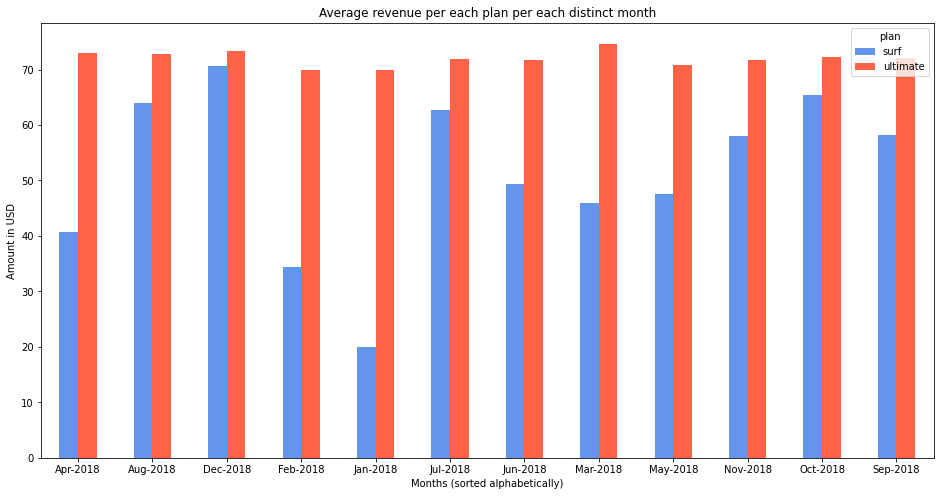

In [141]:
# Plot a bar plot to visualize - mean_revenue
mean_revenue.plot.bar(figsize=(16,8), rot=0, color=['CornflowerBlue', 'Tomato'])

# Set the plot attributes
plt.title('Average revenue per each plan per each distinct month')
plt.ylabel('Amount in USD')
plt.xlabel('Months (sorted alphabetically)')

plt.show()

**From the given data and the plot about the average revenue per each plan per each distinct month, we can conclude the following**:  
- The average revenue for the Ultimate plan is consistently higher than that of the Surf plan across all months.

- There is a general trend of increasing revenue over time for both plans, with higher revenue observed in the latter months of the year.

- The difference in average revenue between the two plans is not as large as the difference in their monthly costs, indicating that customers on the Ultimate plan are likely using more of the additional features and services offered by the plan, such as higher data limits and more inclusive minutes and messages.

#### Check whether users on the different plans have different revenues

Let's check whether users on the different plans have different revenues. Let's create a pivot table:

In [142]:
# Calculate the mean and the variance of the monthly revenues
monthly_revenue_stats = user_consumption_per_month.pivot_table(index='plan', values='usd_monthly_revenue', aggfunc=['mean', 'var', 'std', 'median'])
monthly_revenue_stats.columns = ['mean_monthly_revenue', 'var_monthly_revenue', 'std_monthly_revenue', 'median_monthly_revenue']
monthly_revenue_stats

,mean_monthly_revenue,var_monthly_revenue,std_monthly_revenue,median_monthly_revenue
plan,,,,
surf,60.706408,3067.835152,55.388042,40.36
ultimate,72.313889,129.848486,11.395108,70.00


Looking at the descriptive statistics data for monthly revenues of Megaline's Surf and Ultimate plans, we can conclude that:

- On average, **customers on the Ultimate plan generate higher revenue per month compared to those on the Surf plan**. The mean monthly revenue for Ultimate is 72.31, which is significantly higher than the mean monthly revenue for Surf, which is 60.71.
- The variance in monthly revenue for Surf is significantly higher than that for Ultimate, indicating that there is more variability in monthly revenue for the Surf plan compared to the Ultimate plan.
- The standard deviation of monthly revenue for Surf is 55.39, which is higher than that of Ultimate (11.40). This means that revenue for the Surf plan is more spread out compared to that for the Ultimate plan.
- The median monthly revenue for Ultimate is 70.00, while for Surf it is 40.36. **This indicates that at least half of the customers on the Ultimate plan generate revenue of 70.00 or more per month, while at least half of the customers on the Surf plan generate revenue of 40.36 or less per month**.  

Overall, these statistics suggest that the **Ultimate plan is more profitable for Megaline, as customers on this plan generate higher revenue on average and revenue is more consistent compared to the Surf plan**.

#### Visualize the distribution of the monthly revenues

Let's plot a box plot to visualize the distribution of the monthly revenues. But, before that, let's have quick refresh of what data our Dataframe - `user_consumption_per_month` holds:

In [143]:
user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


Now, let's get a subset of our data in the Dataframe - `user_consumption_per_month` that belongs to **Surf** plan users. We already have this data in `surf_user_consumption_per_month` Dataframe. So, let's see how the distribution looks for the monthly revenues of the surf plan holders:

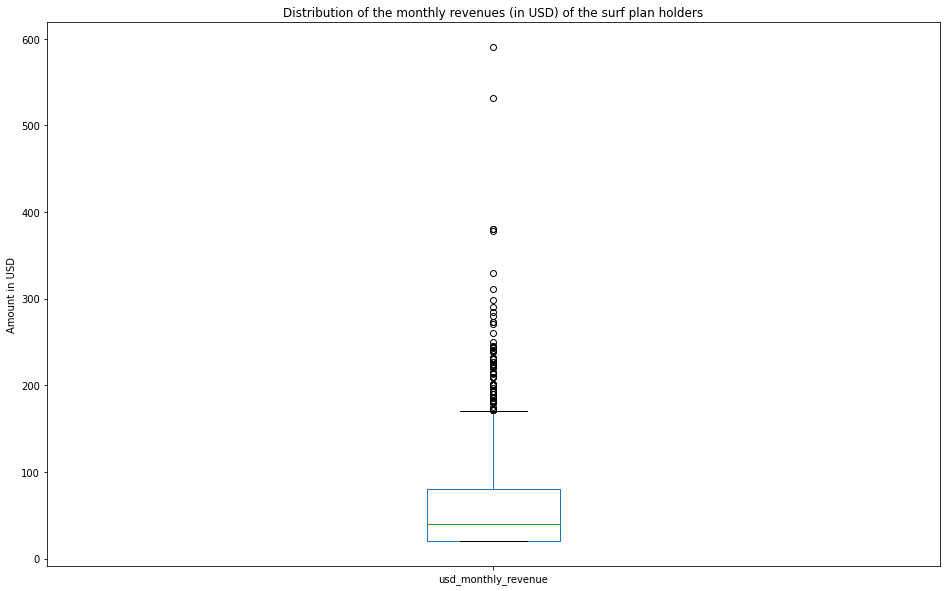

In [144]:
# Plot a boxplot to visualize the distribution of the monthly revenues of the surf plan holders
surf_user_consumption_per_month['usd_monthly_revenue'].plot.box(figsize=(16,10))

# Set the plot attributes
plt.ylabel('Amount in USD')
plt.title('Distribution of the monthly revenues (in USD) of the surf plan holders')

plt.show()

Let's also get a descriptive statistics for the Series - `surf_user_consumption_per_month['usd_monthly_revenue']`:

In [145]:
surf_user_consumption_per_month['usd_monthly_revenue'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: usd_monthly_revenue, dtype: float64

**Based on the given descriptive statistics data and the observations from the box plot, we can conclude the following about the distribution of monthly revenues for Surf plan users**:

- **Count**: There are **1573 data points** or monthly revenue values available.

- **Mean**: The average monthly revenue for Surf plan users is **60.71 dollars**.

- **Standard Deviation**: The standard deviation of monthly revenue for Surf plan users is **55.39 dollars**. This indicates that there is a significant variation in monthly revenue among Surf plan users.

- **Minimum**: The minimum monthly revenue is **20 dollars**. **This indicates that some users paid only the basic monthly charge**.

- **Maximum**: The maximum monthly revenue is **590.37 dollars**. This indicates that some Surf plan users paid a much higher amount, possibly because of additional charges.

- **Quartiles**: The 25th percentile of monthly revenue is 20 dollars, **the median (50th percentile) is 40.36 dollars**, and the 75th percentile is 80.36 dollars. These quartiles divide the data into four equal parts and provide insight into the distribution of monthly revenue for Surf plan users.  

- There are outliers in the distribution, **590.37 dollars** being the maximum.  

Overall, we can conclude that **the distribution of monthly revenues for Surf plan users is positively skewed or rightly skewed**. The majority of Surf plan users (50%) paid between 20 dollars and 40.36 dollars per month, while some users paid as little as the basic charge and some paid much more.

Now, let's plot a box plot to visualize the monthwise revenues (in USD) of the surf plan holders:

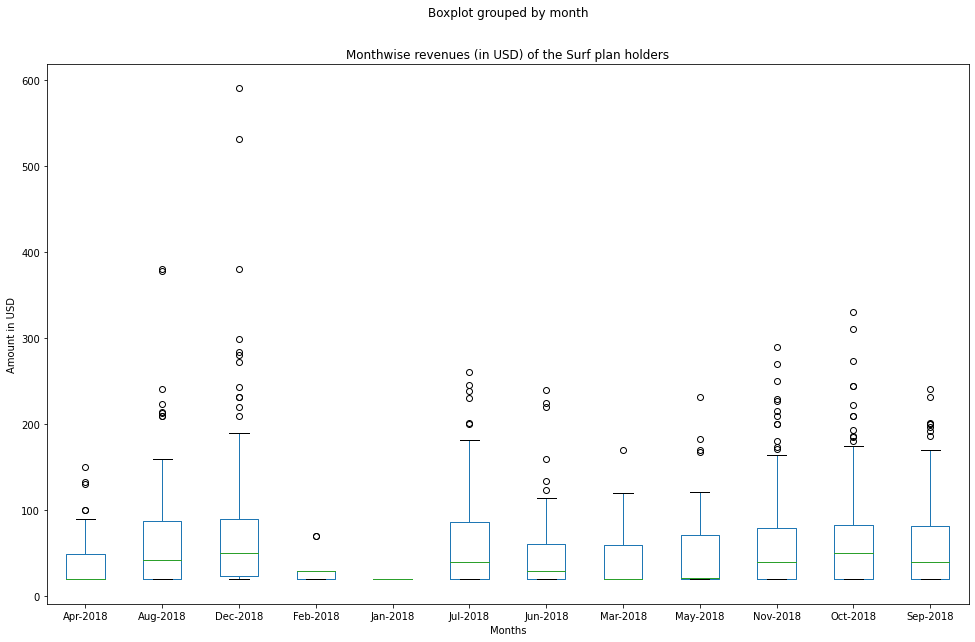

In [146]:
# Plot a boxplot to visualize the monthwise revenues (in USD) of the surf plan holders
surf_user_consumption_per_month.boxplot(by ='month', column =['usd_monthly_revenue'], grid = False, figsize=(16,10))

# Set the plot attributes
plt.ylabel('Amount in USD')
plt.xlabel('Months')
plt.title('Monthwise revenues (in USD) of the Surf plan holders')

plt.show()

Interesting! We can see that for Surf plan users:
- **The most extreme outliers lie in the month of December**.
- **There are no outliers in the months of January**.

Now, let's get a subset of our data in the Dataframe - `user_consumption_per_month` that belongs to **Ultimate** plan users. We already have this data in `ultimate_user_consumption_per_month` Dataframe. So, let's see how the distribution looks for the monthly revenues of the ultimate plan holders:

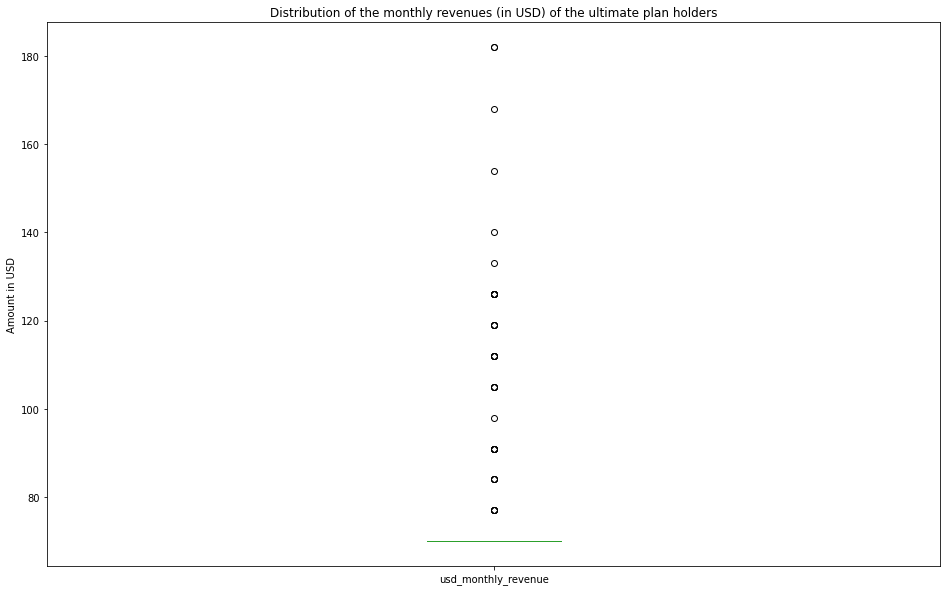

In [147]:
# Plot a boxplot to visualize the distribution of the monthly revenues of the ultimate plan holders
ultimate_user_consumption_per_month['usd_monthly_revenue'].plot.box(figsize=(16,10))

# Set the plot attributes
plt.ylabel('Amount in USD')
plt.title('Distribution of the monthly revenues (in USD) of the ultimate plan holders')

plt.show()

Let's also get a descriptive statistics for the Series - `ultimate_user_consumption_per_month['usd_monthly_revenue']`:

In [148]:
ultimate_user_consumption_per_month['usd_monthly_revenue'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: usd_monthly_revenue, dtype: float64

**Based on the given descriptive statistics data and observations from the box plot, we can conclude the following about the distribution of monthly revenues for Ultimate plan users**:

- **Count**: There are **720 data points** or monthly revenue values available.

- **Mean**: The average monthly revenue for Ultimate plan users is **72.31 dollars**.

- **Standard Deviation**: The standard deviation of monthly revenue for Ultimate plan users is **11.40 dollars**. This indicates that there is relatively low variation in monthly revenue among Ultimate plan users.

- **Minimum**: The minimum monthly revenue is **70 dollars**. **This indicates that all Ultimate plan users paid the basic monthly charge of **70 dollars**.

- **Maximum**: The maximum monthly revenue is **182 dollars**. This indicates that some Ultimate plan users paid more than the basic monthly charge, possibly because of additional charges or higher usage of services.

- **Quartiles**: **The 25th, 50th, and 75th percentiles of monthly revenue are all 70 dollars**. This indicates that the majority of Ultimate plan users paid only the basic monthly charge, and very few users paid more than that.  

Overall, **we can conclude that the distribution of monthly revenues for Ultimate plan users is very narrow and tightly centered around the basic monthly charge of 70 dollars**. There is very little variation in monthly revenue among Ultimate plan users, and the vast majority of them paid only the basic charge. The mean monthly revenue for Ultimate plan users is 72.31 dollars, which is slightly higher than the mean revenue for Surf plan users but still relatively low. 

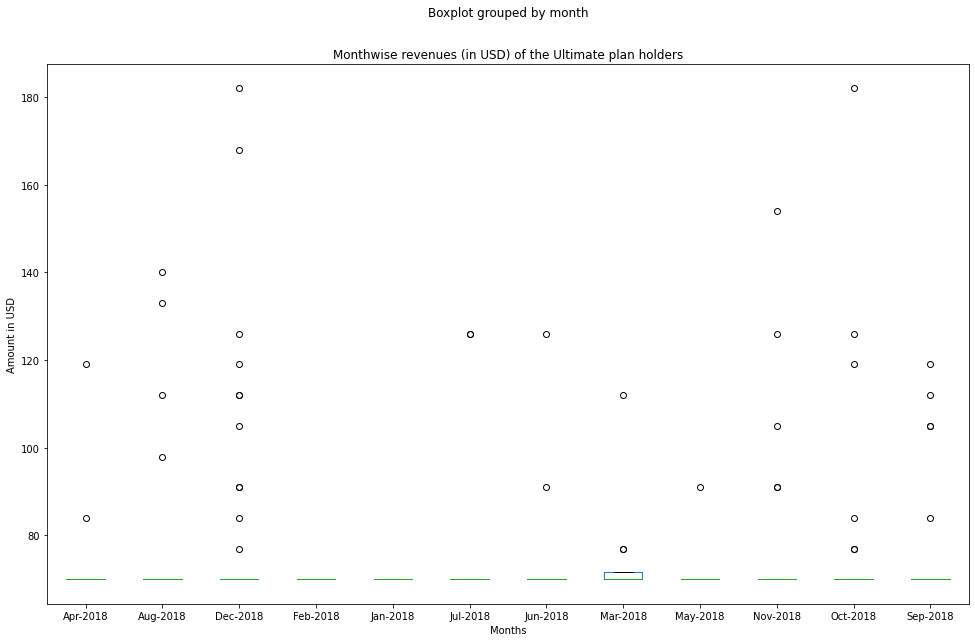

In [149]:
# Plot a boxplot to visualize the monthwise revenues (in USD) of the ultimate plan holders
ultimate_user_consumption_per_month.boxplot(by ='month', column =['usd_monthly_revenue'], grid = False, figsize=(16,10))

# Set the plot attributes
plt.ylabel('Amount in USD')
plt.xlabel('Months')
plt.title('Monthwise revenues (in USD) of the Ultimate plan holders')

plt.show()

We can conclude that **the distribution of monthly revenues for Ultimate plan users is very narrow and tightly centered around the basic monthly charge of 70 dollars**. There are certain ouliers and the maximum being in October and December.

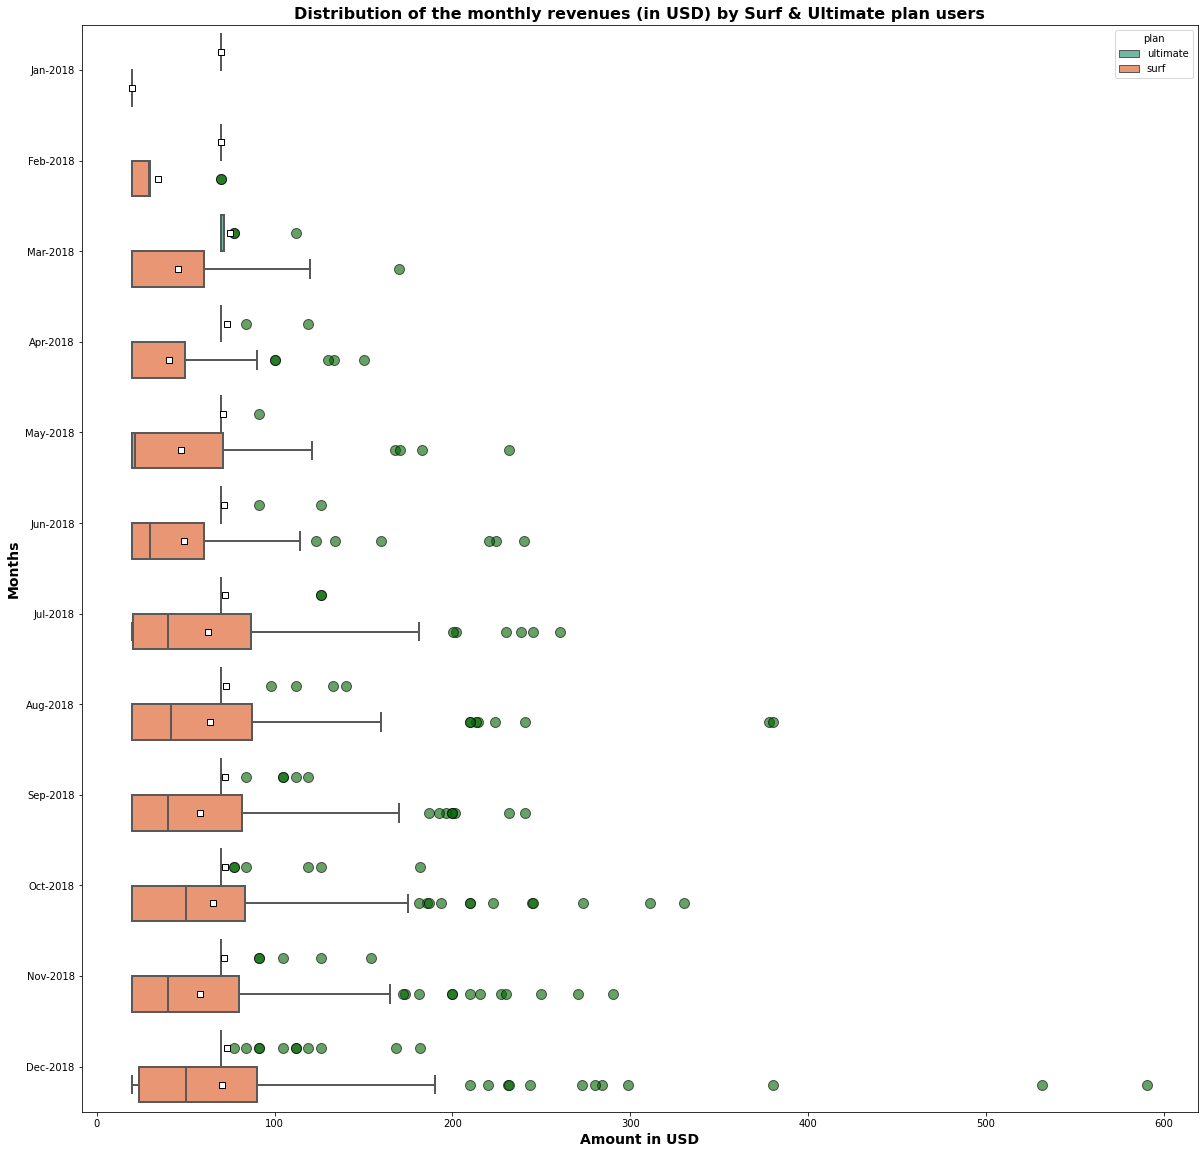

In [150]:
# Plot a boxplot to visualize the distribution of the monthly revenues (in USD) by users

# Set the order in which months will be plotted on the graph
months_order = ['Jan-2018', 'Feb-2018', 'Mar-2018', 'Apr-2018', 'May-2018', 'Jun-2018', 'Jul-2018', 'Aug-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018', 'Dec-2018']

# Customize the markers that show outliers in the data
flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='darkgreen', alpha=0.6)

# Customize the markers that show mean values
meanprops = dict(marker='s', markerfacecolor='white', markeredgecolor='black')

plt.figure(figsize=(20,20))
my_plot = sns.boxplot(
    data=user_consumption_per_month,
    y='month',
    x='usd_monthly_revenue',
    hue='plan',
    order=months_order,
    showmeans=True,
    orient='h',
    linewidth=2,
    flierprops=flierprops,
    meanprops=meanprops,
    palette='Set2')

# Set the plot attributes
my_plot.set_xlabel('Amount in USD', fontsize= 14, fontweight='bold')
my_plot.set_ylabel('Months', fontsize= 14, fontweight='bold')
my_plot.set_title('Distribution of the monthly revenues (in USD) by Surf & Ultimate plan users', fontsize= 16, fontweight='bold')

plt.show()

We can compare the user behaviours between the two plans:

- The distribution of monthly revenues for Ultimate plan users is very narrow and tightly centered around the basic monthly charge of 70 dollars. 
- There are outliers in both surf and ultimate plans. For Surf plan users, the outliers lie mostly in December and for Ultimate plan users, the outliers lie mostly in October and December months.

<div style="border-bottom:2px solid #058EE1;"></div>

## Test statistical hypotheses <a id='test-statistical-hypotheses'></a>  
[Back to Contents](#contents)

### Average revenue from users of the Ultimate and Surf calling plans differs

Let's test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs. For testing the hypothesis, let's formulate the null and the alternative hypotheses.  

**Null Hypothesis**: Average revenue from users of the Ultimate and Surf calling plans are equal  
**Alternative Hypothesis**: Average revenue from users of Surf calling plan is different than the Ultimate calling plan.

In order to test the above hypotheses, we need average user revenue for surf and ultimate plans. Let's calculate them first. We already have surf plan users data in - `surf_user_consumption_per_month` and ultimate plan users data in - `ultimate_user_consumption_per_month`:

In [151]:
# Average revenue from users of the Surf plan
surf_mean_user_revenue = surf_user_consumption_per_month.groupby('user_id')['usd_monthly_revenue'].mean()
surf_mean_user_revenue.head(10)

user_id
1001     50.018000
1002     33.333333
1003    158.120000
1004     76.250000
1005     40.000000
1007    155.776000
1009    109.827500
1010     41.848889
1012     20.000000
1014     29.420000
Name: usd_monthly_revenue, dtype: float64

In [152]:
# Average revenue from users of the Ultimate plan
ultimate_mean_user_revenue = ultimate_user_consumption_per_month.groupby('user_id')['usd_monthly_revenue'].mean()
ultimate_mean_user_revenue.head(10)

user_id
1000     70.0
1006     77.0
1008     70.0
1011     70.0
1013     70.0
1026     70.0
1028    119.0
1030     70.0
1031     70.0
1032     70.0
Name: usd_monthly_revenue, dtype: float64

In [153]:
# Test the hypotheses
alpha = 0.05 # significance level

results = st.ttest_ind(surf_mean_user_revenue, ultimate_mean_user_revenue)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.00011355294752235661
We reject the null hypothesis


**We can reject the null hypothesis that the 'average revenue from users of the Ultimate and Surf calling plans are equal' to a significance of less than 0.05.** We can say there is a significant difference between the average revenues between users of the Ultimate and Surf calling plans.

### Average revenue from users in the NY-NJ area is different from that of the users from the other regions

Let's test the hypothesis that the aAverage revenue from users in the NY-NJ area is different from that of the users from the other regions. For testing the hypothesis, let's formulate the null and the alternative hypotheses.  

**Null Hypothesis**: Average revenue from users in the NY-NJ area is equal to that of the users from the other regions.  
**Alternative Hypothesis**: Average revenue from users in the NY-NJ area is different from that of the users from the other regions.

In order to test the above hypotheses, we need to prepare our dataset. Let's merge `user_consumption_per_month` Dataframe with `users` Dataframe's two columns - `user_id` and `city`:

In [154]:
# Merge user_consumption_per_month and users (required columns) on user_id
all_cities_user_consumption_per_month = user_consumption_per_month.merge(users[['user_id', 'city']], on='user_id')
all_cities_user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue,city
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,Mickey Wilkerson,Sep-2018,49.0,297.69,315.0,44.0,13.002754,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
6,1002,Carlee Hoffman,Dec-2018,47.0,363.24,384.0,41.0,14.058828,15.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00,"Las Vegas-Henderson-Paradise, NV MSA"
7,1002,Carlee Hoffman,Nov-2018,55.0,359.76,386.0,32.0,18.891680,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00,"Las Vegas-Henderson-Paradise, NV MSA"
8,1002,Carlee Hoffman,Oct-2018,11.0,54.13,59.0,15.0,6.398447,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00,"Las Vegas-Henderson-Paradise, NV MSA"
9,1003,Reynaldo Jenkins,Dec-2018,149.0,1041.00,1104.0,50.0,26.410293,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12,"Tulsa, OK MSA"


Let's now create two separate Dataframes to store users from the NY-NJ area and other users:

In [155]:
# Store data of users from the NY-NJ area 
ny_nj_user_consumption_per_month = all_cities_user_consumption_per_month[all_cities_user_consumption_per_month['city'].str.contains('NY-NJ')]
ny_nj_user_consumption_per_month.head(10)

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue,city
56,1014,Edmundo Simon,Dec-2018,150.0,1050.62,1114.0,64.0,7.609775,8.0,surf,50,15360,500,20,10,0.03,0.03,15.0,38.84,"New York-Newark-Jersey City, NY-NJ-PA MSA"
57,1014,Edmundo Simon,Nov-2018,28.0,149.33,163.0,9.0,1.148037,2.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
75,1022,Bo Snow,Aug-2018,80.0,598.78,631.0,NaN,20.825518,21.0,surf,50,15360,500,20,10,0.03,0.03,15.0,83.93,"New York-Newark-Jersey City, NY-NJ-PA MSA"
76,1022,Bo Snow,Dec-2018,82.0,552.27,585.0,NaN,17.855098,18.0,surf,50,15360,500,20,10,0.03,0.03,15.0,52.55,"New York-Newark-Jersey City, NY-NJ-PA MSA"
77,1022,Bo Snow,Jul-2018,70.0,448.25,475.0,NaN,9.700342,10.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
78,1022,Bo Snow,Jun-2018,76.0,455.45,490.0,NaN,22.887187,23.0,surf,50,15360,500,20,10,0.03,0.03,15.0,100.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
79,1022,Bo Snow,May-2018,39.0,287.34,302.0,NaN,4.793047,5.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
80,1022,Bo Snow,Nov-2018,72.0,469.25,498.0,NaN,21.684063,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
81,1022,Bo Snow,Oct-2018,83.0,544.05,574.0,NaN,18.517002,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,62.22,"New York-Newark-Jersey City, NY-NJ-PA MSA"
82,1022,Bo Snow,Sep-2018,66.0,482.28,510.0,NaN,13.787334,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.30,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [156]:
# Store data of users who are not from the NY-NJ area 
other_cities_user_consumption_per_month = all_cities_user_consumption_per_month[~all_cities_user_consumption_per_month['city'].str.contains('NY-NJ')]
other_cities_user_consumption_per_month.head()

,user_id,user_name,month,number_of_calls,call_mins,rounded_up_call_mins,number_of_messages,actual_gb_used,rounded_up_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,usd_monthly_revenue,city
0,1000,Anamaria Bauer,Dec-2018,16.0,116.83,124.0,11.0,1.856904,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,Mickey Wilkerson,Aug-2018,27.0,171.14,182.0,30.0,6.756982,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,Mickey Wilkerson,Dec-2018,56.0,392.93,412.0,44.0,18.915215,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,Mickey Wilkerson,Nov-2018,64.0,404.59,426.0,36.0,18.070605,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,Mickey Wilkerson,Oct-2018,65.0,374.11,393.0,53.0,21.807119,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09,"Seattle-Tacoma-Bellevue, WA MSA"


In order to test the above hypotheses, we need average revenue from users in the NY-NJ area and other areas. Let's calculate them first. We already have the data of users in the NY-NJ area in - `ny_nj_user_consumption_per_month` and of other users in - `other_cities_user_consumption_per_month`:

In [157]:
# Average revenue from users in the NY-NJ area
ny_nj_mean_user_revenue = ny_nj_user_consumption_per_month.groupby('user_id')['usd_monthly_revenue'].mean()
ny_nj_mean_user_revenue.head(10)

user_id
1014    29.420000
1022    56.125000
1024    21.920000
1027    33.333333
1031    70.000000
1034    20.000000
1043    84.000000
1045    61.900000
1049    20.000000
1053    55.055000
Name: usd_monthly_revenue, dtype: float64

In [158]:
# Average revenue from users not in the NY-NJ area
other_cities_mean_user_revenue = other_cities_user_consumption_per_month.groupby('user_id')['usd_monthly_revenue'].mean()
other_cities_mean_user_revenue.head(10)

user_id
1000     70.000000
1001     50.018000
1002     33.333333
1003    158.120000
1004     76.250000
1005     40.000000
1006     77.000000
1007    155.776000
1008     70.000000
1009    109.827500
Name: usd_monthly_revenue, dtype: float64

In [159]:
# Test the hypotheses
alpha = 0.05 # significance level

results = st.ttest_ind(ny_nj_mean_user_revenue, other_cities_mean_user_revenue)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.48043818838129104
We can't reject the null hypothesis


Awesome! **We cannot reject the null hypothesis that the average revenue from users in the NY-NJ area is equal to that of the users from the other regions**.

<div style="border-bottom:2px solid #058EE1;"></div>

## General conclusion <a id='general-conclusion'></a>  
[Back to Contents](#contents)

**Calls**
- Customers on the Ultimate plan tend to have longer average call durations than those on the Surf plan.
- Both plans show a general trend of increasing average call durations from January to December, which could indicate a seasonal effect or a trend in customer behavior.
- The distribution of monthly call duration for Surf plan users is positively or slightly right skewed. The majority of Surf plan users (50%) make calls that are less than 430 minutes per month, while some users make very long calls, up to a maximum of 1510 minutes per month.
- The distribution of monthly call duration for Ultimate plan users is positively skewed or slightly right skewed. The majority of Ultimate plan users (50%) make calls that are less than 425 minutes per month, while some users make very long calls, up to a maximum of 1369 minutes per month. The mean monthly call duration for Ultimate plan users is slightly higher than that of Surf plan users, but the difference is not significant.
- Mostly all the users regardless of the plan they are in, talk less in the starting of the year but they tend to talk more as we progess towards the end of the year.   

**Messages**
- The average number of messages sent by both Surf and Ultimate plan users is relatively low, with most months having an average of fewer than 50 messages per month.
- In most months, Ultimate plan users sent more average messages per month compared to Surf plan users.
- The highest average number of messages sent per month for both plans was in December 2018.
- The distribution of monthly number of messages for Surf plan users is positively skewed or right skewed. The majority of Surf plan users (50%) sent 32 or fewer messages per month, while some users sent up to 266 messages per month.
- The distribution of monthly number of messages for Ultimate plan users is positively skewed or right skewed. The majority of Ultimate plan users (50%) sent 41 or fewer messages per month, while some users sent up to 166 messages per month. The mean monthly number of messages for Ultimate plan users is slightly higher than that of Surf plan users. However, the maximum monthly number of messages is lower for Ultimate plan users compared to Surf plan users.   

**Internet**
- Both plans show a similar pattern in internet usage over time, with higher consumption during the later months of the year (Oct, Nov, Dec) and lower consumption during the early months (Jan, Feb, Mar).
- January appears to be the month with the least amount of internet usage for both plans.
- The difference in average internet usage between the two plans is not significant, with only about a 2-3 GB difference on average.
- The distribution of monthly internet traffic consumption for Surf plan users is positively skewed or right skewed. The majority of Surf plan users (50%) consumed between 12 GB and 21 GB of internet traffic per month, while some users consumed as little as 1 GB and as much as 70 GB.
- The distribution of monthly internet traffic consumption for Ultimate plan users is also slightly positively skewed or very slighty right skewed (Mean - 17.33 GB > Median 17GB). The majority of Ultimate plan users (50%) consumed between 13 GB and 21 GB of internet traffic per month, while some users consumed as little as 1 GB and as much as 46 GB. The mean monthly internet traffic consumption for Ultimate plan users is 17.33 GB, which is slightly higher than the mean consumption for Surf plan users. However, the difference is not very significant.  

**Revenue**
- Ultimate plan is more profitable for Megaline, as customers on this plan generate higher revenue on average and revenue is more consistent compared to the Surf plan.
- There is a general trend of increasing revenue over time for both plans, with higher revenue observed in the latter months of the year.
- The difference in average revenue between the two plans is not as large as the difference in their monthly costs, indicating that customers on the Ultimate plan are likely using more of the additional features and services offered by the plan, such as higher data limits and more inclusive minutes and messages.
- The distribution of monthly revenues for Surf plan users is positively skewed or rightly skewed. The majority of Surf plan users (50%) paid between 20 dollars and 40.36 dollars per month, while some users paid as little as the basic charge and some paid much more.
- The distribution of monthly revenues for Ultimate plan users is very narrow and tightly centered around the basic monthly charge of 70 dollars. There is very little variation in monthly revenue among Ultimate plan users, and the vast majority of them paid only the basic charge. The mean monthly revenue for Ultimate plan users is 72.31 dollars, which is slightly higher than the mean revenue for Surf plan users but still relatively low.  

**There is a significant difference between the average revenues between users of the Ultimate and Surf calling plans.**. 

**The average revenue from users in the NY-NJ area is equal to that of the users from the other regions.**